
# **Задание 1**

Есть таблица с данными о геолокации автомобиля, данные в нее попадают каждую минуту, но случаются пропуски в данных за какой то интервал времени и частота меняется, при этом наполнение столбцов всегда полное.



Название,	Тип,	Описание

```
Car_id, integer, Идентификатор_машины

Latitude, numeric, Широта

Longitude, numeric, Долгота

datetime, timestamp, Время_замера
```




Напишите запрос, выводящий машину которая больше всего стояла без движения в течение дня

---
**Ход мыслей**

У нас есть координаты и время, нужно сгруппировать строки таким образом, чтобы значений строк в группах могли повторяться и считались, как отдельные группы. 

Делаем сдвиг первого столбца вниз через shift, чтобы первое значение стало Nan. 
Потому сравниваем строки в исходной колонке со сдвинутой, если они неравны - то возвращаем True, он же 1. Если значения в неравенстве будут равны - даст False, он же 0. Посчитаем накопительную сумму, по сути мы сможем разделить на группы этим алгоритмом и сгруппировать по cumsum значениям.

55 != Nan True 1   = cumsum 1

55 != 55 False 0  = cumsum 1

55 != 55 False 0  = cumsum 1

55 != 56 True 1 =  cumsum 2

56 != 56 False 0 = cumsum 2


Дальше нужно найти в группе min и max значения даты и их разность в секундах.

Отсортировать DESC

Для теста создадим датесет

In [1]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame(np.array([[1,55.111111,37.617258,'2000-01-01 10:00:00'],
                             [1,55.111111,37.617258,'2000-01-01 10:10:00'],
                             [1,55.111111,37.617258,'2000-01-01 10:20:00'],
                             [1,55.111111,37.617358,'2000-01-01 10:30:00'],

                             [1,55.211111,37.617358,'2000-01-01 11:00:00'],

                             [1,55.311111,37.617358,'2000-01-01 11:20:00'],
                             [1,55.311111,37.617358,'2000-01-01 11:30:00'],
                             [1,55.311111,37.617358,'2000-01-01 11:40:00'],

                             [1,55.111111,37.617358,'2000-01-01 12:40:00'],
                             [1,55.111111,37.617358,'2000-01-01 12:50:00'],


                             [2,55.111111,37.617258,'2000-01-01 10:00:00'],
                             [2,55.111111,37.617258,'2000-01-01 10:10:00'],

                             [2,55.211111,37.617258,'2000-01-01 10:20:00'],
                             [2,55.211111,37.617258,'2000-01-01 10:30:00'],

                             [2,55.111111,37.617258,'2000-01-01 11:00:00'],
                             [2,55.111111,37.617258,'2000-01-01 11:10:00'],

                             [2,55.211111,37.617258,'2000-01-01 11:20:00'],
                             [2,55.211111,37.617258,'2000-01-01 11:21:00'],

                             [2,55.111111,37.617258,'2000-01-01 12:00:00'],
                             [2,55.111111,37.617258,'2000-01-01 12:10:00'],



                             ]),
                            columns=['Car_id', 'Latitude', 'Longitude','datetime'])


df_types = ({'Car_id': 'int64',
            'Latitude':'float64',
            'Longitude':'float64',
            'datetime': 'datetime64[ns]'})

df1 = df1.astype(df_types)


In [2]:
df1.dtypes

Car_id                int64
Latitude            float64
Longitude           float64
datetime     datetime64[ns]
dtype: object

In [3]:
df1

Car_id   Latitude  Longitude            datetime
0        1  55.111111  37.617258 2000-01-01 10:00:00
1        1  55.111111  37.617258 2000-01-01 10:10:00
2        1  55.111111  37.617258 2000-01-01 10:20:00
3        1  55.111111  37.617358 2000-01-01 10:30:00
4        1  55.211111  37.617358 2000-01-01 11:00:00
5        1  55.311111  37.617358 2000-01-01 11:20:00
6        1  55.311111  37.617358 2000-01-01 11:30:00
7        1  55.311111  37.617358 2000-01-01 11:40:00
8        1  55.111111  37.617358 2000-01-01 12:40:00
9        1  55.111111  37.617358 2000-01-01 12:50:00
10       2  55.111111  37.617258 2000-01-01 10:00:00
11       2  55.111111  37.617258 2000-01-01 10:10:00
12       2  55.211111  37.617258 2000-01-01 10:20:00
13       2  55.211111  37.617258 2000-01-01 10:30:00
14       2  55.111111  37.617258 2000-01-01 11:00:00
15       2  55.111111  37.617258 2000-01-01 11:10:00
16       2  55.211111  37.617258 2000-01-01 11:20:00
17       2  55.211111  37.617258 2000-01-01 11:21:00
18       2  55.111111  37.617258 2000-01-01 12:00:00
19       2  55.111111  37.617258 2000-01-01 12:10:00

In [4]:
  def diff_date(x):
       max_date = x.max()
       min_date = x.min()
       diff_month = (max_date - min_date).seconds
       return diff_month

In [5]:
df1.groupby(['Car_id','Latitude',(df1.Latitude!=df1.Latitude.shift()).cumsum()], as_index=False) \
.agg({'datetime':diff_date}) \
.sort_values(ascending=False, by='datetime')

Car_id   Latitude  datetime
0       1  55.111111      1800
3       1  55.311111      1200
1       1  55.111111       600
4       2  55.111111       600
5       2  55.111111       600
6       2  55.111111       600
7       2  55.211111       600
8       2  55.211111        60
2       1  55.211111         0

**Задание 2**

Каждое бронирование записывается в табличку rents с полями

```
•	rent_id, -- идентификатор брони
•	rent_created_date, --дата создания
•	user_name, -- имя пользователя, обфусцированно
•	city_name, --название города
•	country_name, -- название страны
•	car_id, -- id машины
•	rent_start, -- дата начала
•	rent_end, -- дата конца
•	rent_cost --сумма ренты
```
В сервисе произошел сбой и появились машины, забронированные в один день несколькими пользователями
1.	Напишите код (SQL, PL/SQL,python любой другой ЯП) , который выведет только актуальные бронирования с учетом возможности частичной отмены. (1е по дате создания бронирование конкретного дня считать основным, все последующие пересекающиеся бронирования на этот день аннулируются). 

Пример:
Есть 2 бронирования: 

•	бронирование 123 создано 2 февраля, и оно относится к машине X с 1го февраля по 5е января, его стоимость 1000 руб

•	Бронирование 987 создано 1 февраля, и оно относится к машине X с 3го февраля по 4е февраля его стоимость 500 руб

Результатом вычистки будет следующая принадлежность дате к бронированиям

•	1 февраля – бронирование 123

•	2 февраля – бронирование 123

•	3 февраля – бронирование 987

•	4 февраля – бронирование 987

•	5 февраля – бронирование 123

Пересечением по пользователям пренебрегаем, т. к. считаем, что один пользователь может бронировать несколько машин в один и тот же день.
2.	Оцените потери, которые придется возмещать пользователям за отмененные бронирования дней, и выведите топ 10 пользователей, которым будут самые большие возвраты. Считаем, что стоимость дня внутри одного бронирования одинакова.

В предыдущем примере за бронирование 123 мы будем должны пользователю 2 дня из 5, т.е. 400 рублей из 1000. За бронирование 987 компенсации не будет, т. к. оно будет реализовано целиком.
3.	Посчитайте число машин, которое необходимо было иметь сервису, чтобы покрыть все существующие бронирования (считая, что все машины – одинаковой категории).
4.	На основе только актуальных бронирований (не дублирующихся) – постройте отчет (Excel, BI, Python, любой другой способ визуализации) с ежедневной выручкой, по регионам, типам автомобилей и количеству активных пользователей.





**Ход мыслей**

1) Нужно понять как пересекаются периоды дат аренды машины. Поэтому найдем список дней из начала и конца дат аренды.

2) Чтобы сравнить даты между участниками аренды, создадим пустой список брони и будем сравнивать каждую строку и добавлять уникальные значения для каждой машины. Когда попадутся повторы - сохраним в отдельную колонку.

3) В итоге задача заключается в том, чтобы период сперва почистить от повторов и потом собрать уникальные даты для каждого пользователя.

4) Оценить убыток - считаем длину массива повторных дат и в пропорции считаем от rent_cost


#1.	Напишите код (SQL, PL/SQL,python любой другой ЯП) , который выведет только актуальные бронирования с учетом возможности частичной отмены. (1е по дате создания бронирование конкретного дня считать основным, все последующие пересекающиеся бронирования на этот день аннулируются). 

In [6]:
# • rent_id, -- идентификатор брони
# •    rent_created_date, --дата создания
# •    user_name, -- имя пользователя, обфусцированно
# •    city_name, --название города
# •    country_name, -- название страны
# •    car_id, -- id машины
# •    rent_start, -- дата начала
# •    rent_end, -- дата конца
# •    rent_cost --сумма ренты 

#Меняем отображение ширины строк
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)


df2 = pd.read_csv('rents_test_interview.csv')

df_types = ({'rent_created_date': 'datetime64[ns]',
            'rent_start':'datetime64[ns]',
            'rent_end':'datetime64[ns]',
            'rent_cost': 'float64'})

df2 = df2.astype(df_types)

#Из начала-конца дат получаем лист дней
def make_list_dates(x):
  return pd.date_range(start=x.rent_start, end=x.rent_end)


#Для каждой машины отсортируем rent_created_date
df2_grouped = df2.groupby(['car_id','rent_created_date','rent_start','rent_end','city_name','user_name'], as_index=False) \
.agg({'rent_cost':'sum'}) \
.sort_values(by=['car_id','rent_created_date'], ascending=[True,True])

df2_grouped['list_dates']= df2_grouped.apply(make_list_dates, axis=1)
df2_grouped['list_dates_list'] = df2_grouped.list_dates.apply(lambda x: x.strftime("%Y-%m-%d").tolist())
df2_grouped.drop(columns=['list_dates'], inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [7]:
car_id_dict = {}

In [8]:
#Заполняет словарь key = car_id и value = лист уникальных дат
def fix_date(car_id, dates):
  global car_id_dict 
  if car_id not in car_id_dict.keys():
    car_id_dict[car_id] = []
  
  unique = list((set(car_id_dict[car_id]) ^ set(dates)) & set(dates))
  repeated = list(set(car_id_dict[car_id]) & set(dates))
  #print(f'unique:{unique}\nrepeated:{repeated}\n')
  if len(repeated) == 0 and len(unique) != 0:
    car_id_dict[car_id] += unique
    return 0, dates

  elif len(repeated) != 0 and len(unique) == 0:
    return dates, 0

  elif len(repeated) != 0 and len(unique) != 0:

    car_id_dict[car_id] += unique
    return repeated, unique

In [9]:
#Две колонки, верним в них уникальные(первые) и дубли дат
df2_grouped['repeated_date'], df2_grouped['unique_date'] = zip(*df2_grouped[['car_id','list_dates_list']].apply(lambda x: fix_date(*x), axis=1))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [10]:
#Посчитаем кол-во дней в периоде
df2_grouped['repeated_date_count'] = df2_grouped['repeated_date'].apply(lambda x: 0 if x == 0 else len(x))
df2_grouped['full_date_count'] = df2_grouped['list_dates_list'].apply(lambda x: 0 if x == 0 else len(x))
df2_grouped['unique_date_count'] = df2_grouped['unique_date'].apply(lambda x: 0 if x == 0 else len(x))

In [11]:
df2_grouped

car_id   rent_created_date rent_start   rent_end city_name                         user_name     rent_cost                                                                                               list_dates_list                                                                                                 repeated_date                                                   unique_date  repeated_date_count  full_date_count  unique_date_count
0     2723d092b63885e0d7c260cc007e8b9d 2019-01-01 07:06:47 2019-02-12 2019-02-14  9f61408e  d2ddea18f00665ce8623e36bd4e3c7c5  3081.009321   [2019-02-12, 2019-02-13, 2019-02-14]                                                                          0                                                                                                             [2019-02-12, 2019-02-13, 2019-02-14]                          0                    3                3                
1     2723d092b63885e0d7c260cc007e8b9d 2019-01-01 08:12:20 2019-01-29 2019-02-01  c0c7c76d  4f4adcbf8c6f66dcfc8a3282ac2bf10a  10882.612534  [2019-01-29, 2019-01-30, 2019-01-31, 2019-02-01]                                                              0                                                                                                             [2019-01-29, 2019-01-30, 2019-01-31, 2019-02-01]              0                    4                4                
2     2723d092b63885e0d7c260cc007e8b9d 2019-01-01 12:44:23 2019-02-05 2019-02-09  e2ef524f  d82c8d1619ad8176d665453cfb2e55f0  13894.964416  [2019-02-05, 2019-02-06, 2019-02-07, 2019-02-08, 2019-02-09]                                                  0                                                                                                             [2019-02-05, 2019-02-06, 2019-02-07, 2019-02-08, 2019-02-09]  0                    5                5                
3     2723d092b63885e0d7c260cc007e8b9d 2019-01-01 13:20:06 2019-02-12 2019-02-19  812b4ba2  428fca9bc1921c25c5121f9da7815cde  35702.048589  [2019-02-12, 2019-02-13, 2019-02-14, 2019-02-15, 2019-02-16, 2019-02-17, 2019-02-18, 2019-02-19]              [2019-02-14, 2019-02-12, 2019-02-13]                                                                          [2019-02-15, 2019-02-18, 2019-02-19, 2019-02-16, 2019-02-17]  3                    8                5                
4     2723d092b63885e0d7c260cc007e8b9d 2019-01-01 15:23:43 2019-01-08 2019-01-11  d645920e  5b8add2a5d98b1a652ea7fd72d942dac  8683.251321   [2019-01-08, 2019-01-09, 2019-01-10, 2019-01-11]                                                              0                                                                                                             [2019-01-08, 2019-01-09, 2019-01-10, 2019-01-11]              0                    4                4                
...                                ...                 ...        ...        ...       ...                               ...          ...                                                ...                                                             ..                                                                                                                                                          ...             ..                   ..               ..                
9995  f0935e4cd5920aa6c7c996a5ee53a70f 2019-02-11 11:11:27 2019-03-11 2019-03-14  6364d3f0  d395771085aab05244a4fb8fd91bf4ee  5702.599769   [2019-03-11, 2019-03-12, 2019-03-13, 2019-03-14]                                                              [2019-03-11, 2019-03-12, 2019-03-13, 2019-03-14]                                                              0                                                             4                    4                0                
9996  f0935e4cd5920aa6c7c996a5ee53a70f 2019-02-11 17:41:40 2019-03-24 2019-03-28  d09bf415  ad13a2a07ca4b7642959dc0c4c740ab6  17405.391742  [2019-03-24, 2019-03-25, 2019-03-26, 2019-03-27, 2019-03-28]        

#2.	Оцените потери, которые придется возмещать пользователям за отмененные бронирования дней, и выведите топ 10 пользователей, которым будут самые большие возвраты. 

In [12]:

df2_grouped.eval('compensation = (rent_cost / full_date_count) * repeated_date_count', inplace=True)

df2_grouped.groupby(['user_name'], as_index=False) \
.agg({'compensation':sum}) \
.sort_values(ascending=False, by='compensation') \
.head(10)

user_name   compensation
42   1068c6e4c8051cfd4e9ea8072e3189e2  582266.731930
305  9be40cee5b0eee1462c82c6964087ff9  553680.265345
429  db8e1af0cb3aca1ae2d0018624204529  549336.827874
341  ab817c9349cf9c4f6877e1894a1faa00  543003.811308
253  82161242827b703e6acf9c726942a1e4  529056.614817
493  fbd7939d674997cdb4692d34de8633c4  501607.008272
90   26e359e83860db1d11b6acca57d8ea88  500804.289405
298  98dce83da57b0395e163467c9dae521b  496173.319241
276  8f121ce07d74717e0b1f21d122e04521  494732.238989
163  4f6ffe13a5d75b2d6a3923922b3922e5  494229.588330

#3.Посчитайте число машин, которое необходимо было иметь сервису, чтобы покрыть все существующие бронирования (считая, что все машины – одинаковой категории).

# **1 вариант**

Если ограничений по бюджету нет и надо быстро посчитать, то группируем по дням создания аренды и для каждого дня считаем сумму car_id. Чтобы примерно понимать спрос. Находим максимум количества машин в день - 252

Люди берут машину на 1-9 дней. В среднем на 6(округлили) дней.

Еще стоит обратить внимание на такие поправки как ТО, эвакуация, аварии, все что забирает машину из рабочего потока. Пускай это 5% и добавить к финальной сумме машин.



In [13]:
df2_grouped['rent_date'] = df2_grouped.rent_created_date.dt.date

In [14]:
df_car_count = df2_grouped.groupby(['rent_date'], as_index=False).agg({'car_id':'count', 'full_date_count':'sum'})
df_car_count.eval('mean_period = full_date_count / car_id',inplace=True)


In [15]:
df_car_count.max()

rent_date          2019-02-12
car_id             252       
full_date_count    1388      
mean_period        5.74477   
dtype: object

In [16]:
252 * 6 * 1.05

1587.6000000000001

# **2 вариант**

Более точный, мы переворачиваем таблицу с датами и где есть запрос на аренду - ставим 1. Находимся сумму по дням. Максимальное число машин в день и будет самый минимум который необходим для покрытия всех существующих бронирований.

In [17]:
df_car = df2_grouped[['rent_created_date','list_dates_list']]

In [18]:
df_car = df_car.explode('list_dates_list')

In [19]:
df_car = df_car.groupby(['rent_created_date','list_dates_list'], as_index=False).agg(date_count = ('list_dates_list','count'))

In [20]:
date_rent_matrix = df_car.pivot_table(index='rent_created_date',
               columns='list_dates_list',
               values='date_count',
               aggfunc='count',
               fill_value=0)
date_rent_matrix.columns.name = None
date_rent_matrix.index.name = None


In [21]:
car_count = pd.DataFrame(date_rent_matrix.sum()) \
.reset_index() \
.rename(columns={0:'car_count',
                 'index':'date_rent'})

In [22]:
car_count.date_rent = car_count.date_rent.astype('datetime64[ns]')
car_count['month'] = car_count.date_rent.dt.month_name()

In [23]:
#Сколько минимум машин нужно в месяц
car_count.groupby(['month'], as_index=False).agg(car_count = ('car_count','max'))

month  car_count
0  April     123      
1  February  1112     
2  January   677      
3  March     946

In [24]:
print(f'Если считать машины под весь период, то нужно {date_rent_matrix.sum().max()} штук')

Если считать машины под весь период, то нужно 1112 штук


#4. На основе только актуальных бронирований (не дублирующихся) – постройте отчет (Excel, BI, Python, любой другой способ визуализации) с ежедневной выручкой, по регионам, типам автомобилей и количеству активных пользователей.

## Daily revenue


In [25]:
df2_grouped

car_id   rent_created_date rent_start   rent_end city_name                         user_name     rent_cost                                                                                               list_dates_list                                                                                                 repeated_date                                                   unique_date  repeated_date_count  full_date_count  unique_date_count  compensation   rent_date
0     2723d092b63885e0d7c260cc007e8b9d 2019-01-01 07:06:47 2019-02-12 2019-02-14  9f61408e  d2ddea18f00665ce8623e36bd4e3c7c5  3081.009321   [2019-02-12, 2019-02-13, 2019-02-14]                                                                          0                                                                                                             [2019-02-12, 2019-02-13, 2019-02-14]                          0                    3                3                  0.000000      2019-01-01
1     2723d092b63885e0d7c260cc007e8b9d 2019-01-01 08:12:20 2019-01-29 2019-02-01  c0c7c76d  4f4adcbf8c6f66dcfc8a3282ac2bf10a  10882.612534  [2019-01-29, 2019-01-30, 2019-01-31, 2019-02-01]                                                              0                                                                                                             [2019-01-29, 2019-01-30, 2019-01-31, 2019-02-01]              0                    4                4                  0.000000      2019-01-01
2     2723d092b63885e0d7c260cc007e8b9d 2019-01-01 12:44:23 2019-02-05 2019-02-09  e2ef524f  d82c8d1619ad8176d665453cfb2e55f0  13894.964416  [2019-02-05, 2019-02-06, 2019-02-07, 2019-02-08, 2019-02-09]                                                  0                                                                                                             [2019-02-05, 2019-02-06, 2019-02-07, 2019-02-08, 2019-02-09]  0                    5                5                  0.000000      2019-01-01
3     2723d092b63885e0d7c260cc007e8b9d 2019-01-01 13:20:06 2019-02-12 2019-02-19  812b4ba2  428fca9bc1921c25c5121f9da7815cde  35702.048589  [2019-02-12, 2019-02-13, 2019-02-14, 2019-02-15, 2019-02-16, 2019-02-17, 2019-02-18, 2019-02-19]              [2019-02-14, 2019-02-12, 2019-02-13]                                                                          [2019-02-15, 2019-02-18, 2019-02-19, 2019-02-16, 2019-02-17]  3                    8                5                  13388.268221  2019-01-01
4     2723d092b63885e0d7c260cc007e8b9d 2019-01-01 15:23:43 2019-01-08 2019-01-11  d645920e  5b8add2a5d98b1a652ea7fd72d942dac  8683.251321   [2019-01-08, 2019-01-09, 2019-01-10, 2019-01-11]                                                              0                                                                                                             [2019-01-08, 2019-01-09, 2019-01-10, 2019-01-11]              0                    4                4                  0.000000      2019-01-01
...                                ...                 ...        ...        ...       ...                               ...          ...                                                ...                                                             ..                                                                                                                                                          ...             ..                   ..               ..                       ...             ...
9995  f0935e4cd5920aa6c7c996a5ee53a70f 2019-02-11 11:11:27 2019-03-11 2019-03-14  6364d3f0  d395771085aab05244a4fb8fd91bf4ee  5702.599769   [2019-03-11, 2019-03-12, 2019-03-13, 2019-03-14]                                                              [2019-03-11, 2019-03-12, 2019-03-13, 2019-03-14]                                                              0                                                             4                    4                0                  5702.599769   2019-02-11


In [75]:
df2_grouped['fixed_cost'] = df2_grouped.rent_cost - df2_grouped.compensation

new_types = {'rent_cost':'int64',
             'compensation':'int64',
             'fixed_cost':'int64',
             }

df2_grouped.astype(new_types)

df2_grouped['day_cost'] = (df2_grouped.fixed_cost / df2_grouped.unique_date_count).fillna(0).round(1)


In [27]:
daily_revenue = df2_grouped \
.explode('unique_date') \
.pivot_table(index='rent_created_date',
             columns='unique_date',
             values='day_cost',
             aggfunc='sum',
             fill_value=0)

In [28]:
daily_revenue = daily_revenue.drop([0], axis=1).reset_index()

daily_revenue = pd.DataFrame(daily_revenue.sum()) \
.reset_index() \
.rename(columns={0:'day_revenue'})

daily_revenue.unique_date = daily_revenue.unique_date.astype('datetime64[ns]')
daily_revenue['month'] = daily_revenue.unique_date.dt.month_name()
daily_revenue['day'] = daily_revenue.unique_date.dt.day
daily_revenue.day_revenue = daily_revenue.day_revenue.astype('int64')

In [29]:
import plotly.graph_objects as go

def plot_dayle_revenue(df_plot):
  fig = go.Figure()

  for i in df_plot.month.unique():
      x = df_plot.query('@i == month')['day']
      y = df_plot.query('@i == month')['day_revenue']
      fig.add_trace(go.Scatter(x=x, y=y, name=i,
                      text=["tweak line smoothness<br>with 'smoothing' in line object"],
                      hoverinfo='text+name',
                      line_shape='spline',
                              fill='tozeroy'))


  fig.update_traces(hoverinfo='y+name', mode='lines+markers')
  fig.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=16),
                    title={'text': "Daily revenue",
                           'y':0.9,
                           'x':0.5,
                           'xanchor': 'center',
                           'yanchor': 'top'},
                    xaxis_title="Days",
                    yaxis_title="Revenue",
                    plot_bgcolor='rgb(255,255,255)',
                    paper_bgcolor ='rgb(255,255,255)',
                    autosize=True)

  fig.show()

In [30]:
plot_dayle_revenue(daily_revenue)

## Daily revenue split regions

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

#df_matrix = daily_revenue_split_regions
#df_total = Total sum of each split unit
#heat_m_title = 'Daily revenue split regions'
#total_bar_title = 'Total renevue'
#ylabel = 'Region'
#cmap = "Blues"

#Функция для построения тепловой карты с ежедневной выручки на параметр
def heat_map_split_smth(df_matrix, df_total, heat_m_title, total_bar_title, ylabel, cmap, figsize=(40, 30), heat_yticklabels = True, bar_yticklabels = True):
  for i in list(df_matrix.month.unique()):
    #Фильтруем по месяцу, убираем лишние колонки месяц/день/дату, тайпкастим в инт
    df_heat = df_matrix.query('month == @i').T
    df_heat = df_heat.rename(columns=df_heat.loc['day'])
    df_heat = df_heat[~df_heat.index.isin(['rent_date','month','day'])]
    df_heat = df_heat.astype('int64')


    fig, ax = plt.subplots(ncols= 3,figsize=figsize, dpi= 200, gridspec_kw=dict(width_ratios=[30,2,0.5]))

    sns.heatmap(df_heat,cmap=cmap, vmin=0 ,linewidths=.5, annot=True, fmt='g', cbar=False, yticklabels=heat_yticklabels, ax=ax[0])
    sns.heatmap(df_total[[i]],cmap=cmap, vmin=0 ,linewidths=.5, annot=True, fmt='g', cbar=False, yticklabels=bar_yticklabels, ax=ax[1])

    fig.colorbar(ax[1].collections[0], cax=ax[2])

    ax[0].set_title(f'{heat_m_title}, {i}',fontsize=20)
    ax[1].set_title(total_bar_title,fontsize=20)

    ax[0].set(xlabel='Day', ylabel=ylabel)
    ax[1].set(xlabel='', ylabel=ylabel)

    ax[0].tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)

    #plt.tick_params(axis='x',top=True)
    plt.yticks(rotation=0)

In [32]:
daily_revenue_split_regions = df2_grouped \
.explode('unique_date') \
.pivot_table(index=['city_name'],
             columns='unique_date',
             values='day_cost',
             aggfunc='sum',
             fill_value=0)

In [33]:
daily_revenue_split_regions = daily_revenue_split_regions.drop([0], axis=1).reset_index()
daily_revenue_split_regions.set_index('city_name',inplace=True)
daily_revenue_split_regions.columns.name=None
daily_revenue_split_regions.reset_index(inplace=True)

In [34]:
temp = daily_revenue_split_regions.T.reset_index().rename(columns=daily_revenue_split_regions.T.reset_index().iloc[0]).drop(0, axis=0)
temp = temp.rename(columns={'city_name':'date_revenue'})
temp.date_revenue = temp.date_revenue.astype('datetime64[ns]')
temp['month'] = temp.date_revenue.dt.month_name()
temp['day'] = temp.date_revenue.dt.day

In [35]:
total_res = pd.DataFrame(index = (temp[temp.columns.difference(['date_revenue','month','day'])]).T.index)
for i in list(temp.month.unique()):
  index = (temp.query('month == @i')[temp.query('month == @i').columns.difference(['date_revenue','month','day'])]).T.index
  total_res[i] = index.map((temp.query('month == @i')[temp.query('month == @i').columns.difference(['date_revenue','month','day'])].astype('int64').sum()))

total_res['Total'] = total_res.sum(axis=1)
total_res = total_res.sort_values(ascending=False, by='Total')

In [36]:
daily_revenue_split_regions['Total'] = daily_revenue_split_regions.sum(axis=1)
daily_revenue_split_regions.sort_values('Total', ascending=False, inplace=True)
daily_revenue_split_regions.reset_index(inplace=True)
daily_revenue_split_regions.drop(['index'], axis=1, inplace=True)
daily_revenue_split_regions = daily_revenue_split_regions.set_index(['city_name'])
daily_revenue_split_regions.index.name = None
daily_revenue_split_regions_total = daily_revenue_split_regions[['Total']]
daily_revenue_split_regions.drop(['Total'], axis=1, inplace=True)


In [37]:
daily_revenue_split_regions

2019-01-02  2019-01-03  2019-01-04  2019-01-05  2019-01-06  2019-01-07  2019-01-08  2019-01-09  2019-01-10  2019-01-11  2019-01-12  2019-01-13  2019-01-14  2019-01-15  2019-01-16  2019-01-17  2019-01-18  2019-01-19  2019-01-20  2019-01-21  2019-01-22  2019-01-23  2019-01-24  2019-01-25  2019-01-26  2019-01-27  2019-01-28  2019-01-29  2019-01-30  2019-01-31  2019-02-01  2019-02-02  2019-02-03  2019-02-04  2019-02-05  2019-02-06  2019-02-07  2019-02-08  2019-02-09  2019-02-10  2019-02-11  2019-02-12  2019-02-13  2019-02-14  2019-02-15  2019-02-16  2019-02-17  2019-02-18  2019-02-19  2019-02-20  2019-02-21  2019-02-22  2019-02-23  2019-02-24  2019-02-25  2019-02-26  2019-02-27  2019-02-28  2019-03-01  2019-03-02  2019-03-03  2019-03-04  2019-03-05  2019-03-06  2019-03-07  2019-03-08  2019-03-09  2019-03-10  2019-03-11  2019-03-12  2019-03-13  2019-03-14  2019-03-15  2019-03-16  2019-03-17  2019-03-18  2019-03-19  2019-03-20  2019-03-21  2019-03-22  2019-03-23  2019-03-24  2019-03-25  2019-03-26  2019-03-27  2019-03-28  2019-03-29  2019-03-30  2019-03-31  2019-04-01  2019-04-02  2019-04-03  2019-04-04  2019-04-05  2019-04-06  2019-04-07  2019-04-08  2019-04-09  2019-04-10
fe9fc289  0.0         0.0         0.0         0.0         0.0         0.0         0.0         4577.4      4577.4      4577.4      4577.4      4577.4      4577.4      0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         1720.3      0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         2143.8      2143.8      2143.8      0.0         0.0         0.0         0.0         0.0         0.0         3490.6      3490.6      3490.6      7660.6      6820.9      6820.9      6820.9      6820.9      6820.9      0.0         2121.6      2121.6      0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         2218.9      0.0         0.0         0.0         0.0         0.0         1599.5      1599.5      0.0         0.0         0.0         0.0         0.0         0.0         0.0       
54229abf  0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         4599.4      4599.4      4599.4      4599.4      4599.4      4599.4      4599.4      0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         2964.7      2964.7      2964.7      2964.7      2964.7      2964.7      2964.7      2964.7      2964.7      0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         4823.7      4823.7      7779.8      2956.1      2956.1      2956.1      0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0       
a5771bce  2209.4      2209.4      2209.4      4927.5      4927.5      4927.5      2718.1      2718.1      2718.1      2718.1      0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0

In [38]:
daily_revenue_split_regions = daily_revenue_split_regions.T
daily_revenue_split_regions = daily_revenue_split_regions \
.reset_index() \
.rename(columns={'index':'rent_date'})

daily_revenue_split_regions.rent_date = daily_revenue_split_regions.rent_date.astype('datetime64[ns]')
daily_revenue_split_regions['month'] = daily_revenue_split_regions.rent_date.dt.month_name()
daily_revenue_split_regions['day'] = daily_revenue_split_regions.rent_date.dt.day


In [39]:
daily_revenue_split_regions

rent_date  fe9fc289  54229abf  a5771bce  7cbbc409  aab32389  812b4ba2  14bfa6bb  66f041e1  a684ecee  37693cfc  072b030b  7f39f831  6c8349cc  fbd7939d  b6d767d2  8613985e  ec895663  f4b9ec30  e2ef524f  6512bd43  93db85ed  43ec517d  17e62166  093f65e0  c9f0f895  9bf31c7f  34173cb3  d2ddea18  f899139d  735b90b4  9a115815  6974ce5a  ad61ab14  4e732ced  9f61408e  2a38a4a9  9778d5d2  a5bfc9e0  e2c420d9  d67d8ab4  f033ab37  c16a5320  ea5d2f1c  03afdbd6  32bb90e8  ed3d2c21  7647966b  c9e1074f  ac627ab1  3ef81541  26657d5f  02e74f10  6ea9ab1b  45c48cce  70efdf2e  28dd2c79  1ff1de77  fc490ca4  c0c7c76d  98dce83d  182be0c5  c20ad4d7  642e92ef  1f0e3dad  f7177163  e369853d  2838023a  d645920e  67c6a1e7  33e75ff0  92cc2275  8f14e45f  6364d3f0  35f4a8d4  3c59dc04  f457c545  c74d97b0  d09bf415  72b32a1f  3295c76a  98f13708  1c383cd3  68d30a95  d9d4f495  d3d94468  d82c8d16  3416a75f  c51ce410  38b3eff8  d1fe173d  6f4922f4  e4da3b7f  65b9eea6  44f683a8  a3f390d8  c7e1249f  b53b3a3d  a1d0c6e8    month  day
0  2019-01-02  0.0       0.0       2209.4    0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       2357.7    0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       1299.9    0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       January  2  
1  2019-01-03  0.0       0.0       2209.4    0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       2983.0    0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       3233.5    0.0       0.0       0.0       1299.9    0.0       0.0       2824.3    0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       2309.2    0.0       0.0       0.0       1991.9    0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       January  3  
2  2019-01-04  0.0       0.0       2209.4    0.0       0.0       0.0       0.0       0.0       0.0       3034.2    0.0       0.0       0.0       0.0       0.0       0.0       2983.0    0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       3233.5    0.0       0.0       0.0       1299.9    0.0       0.0       2824.3    0.0       0.0       2046.7    0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       5648.3    0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0  

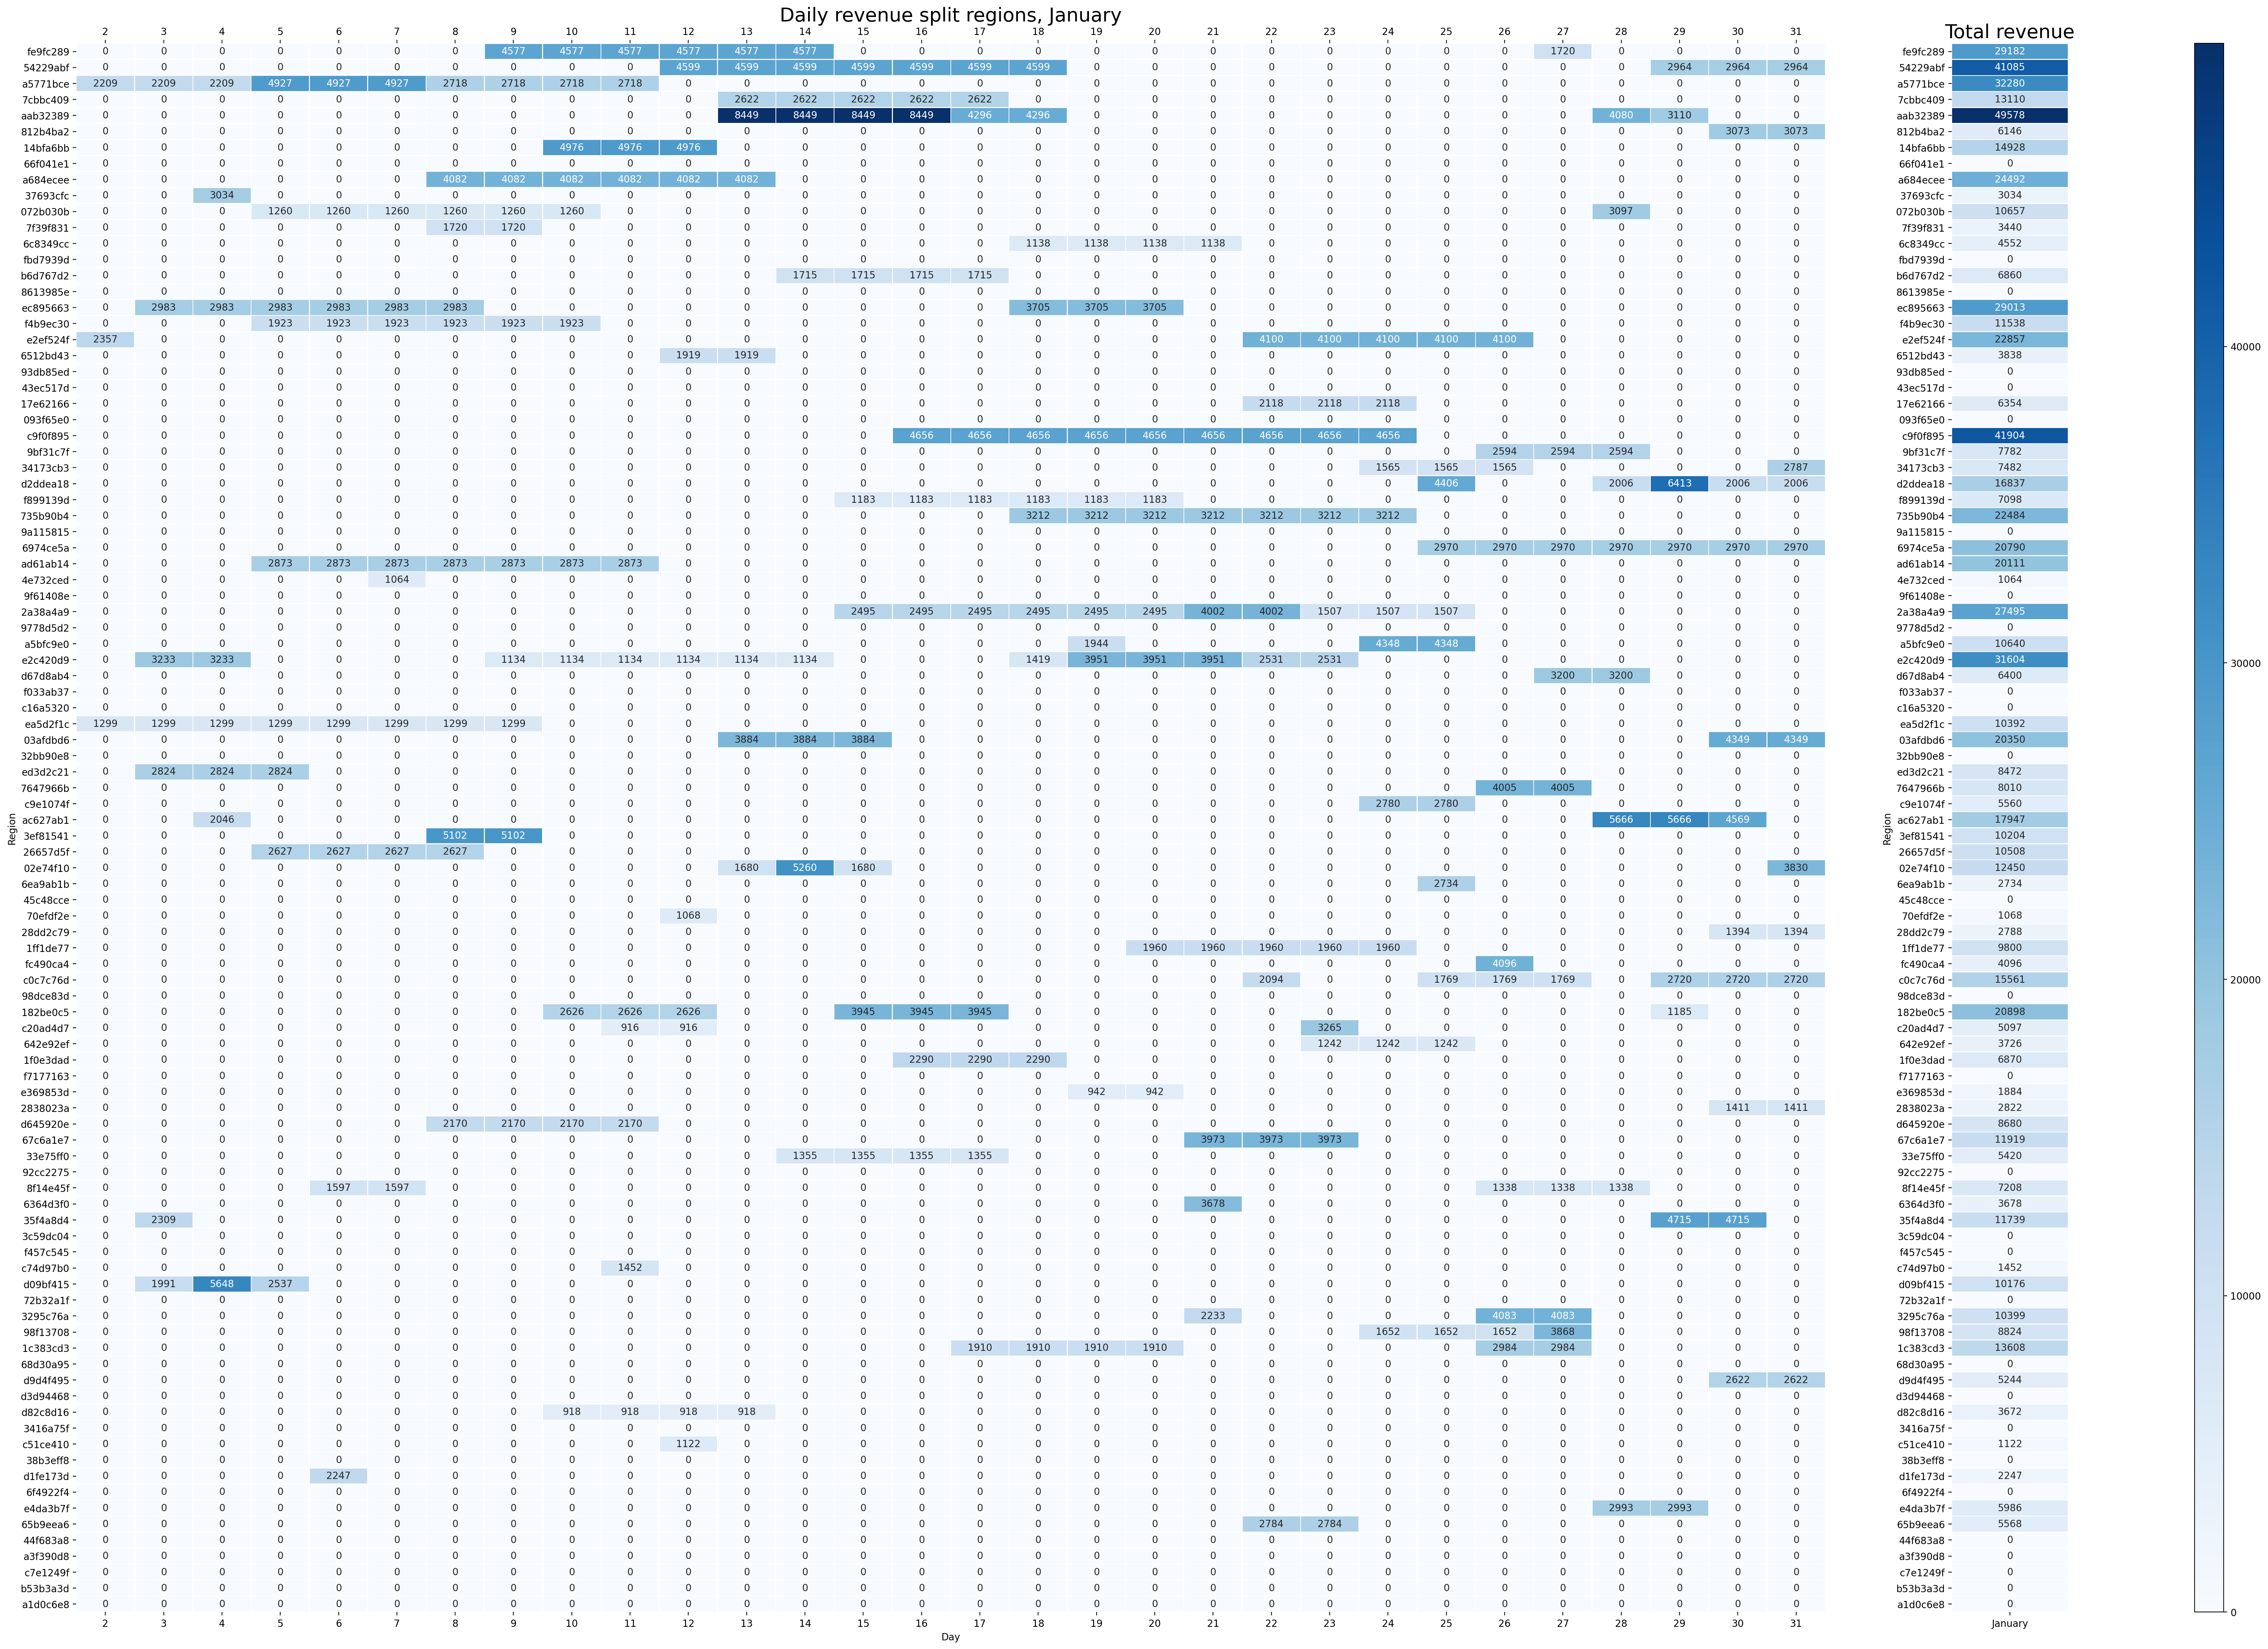

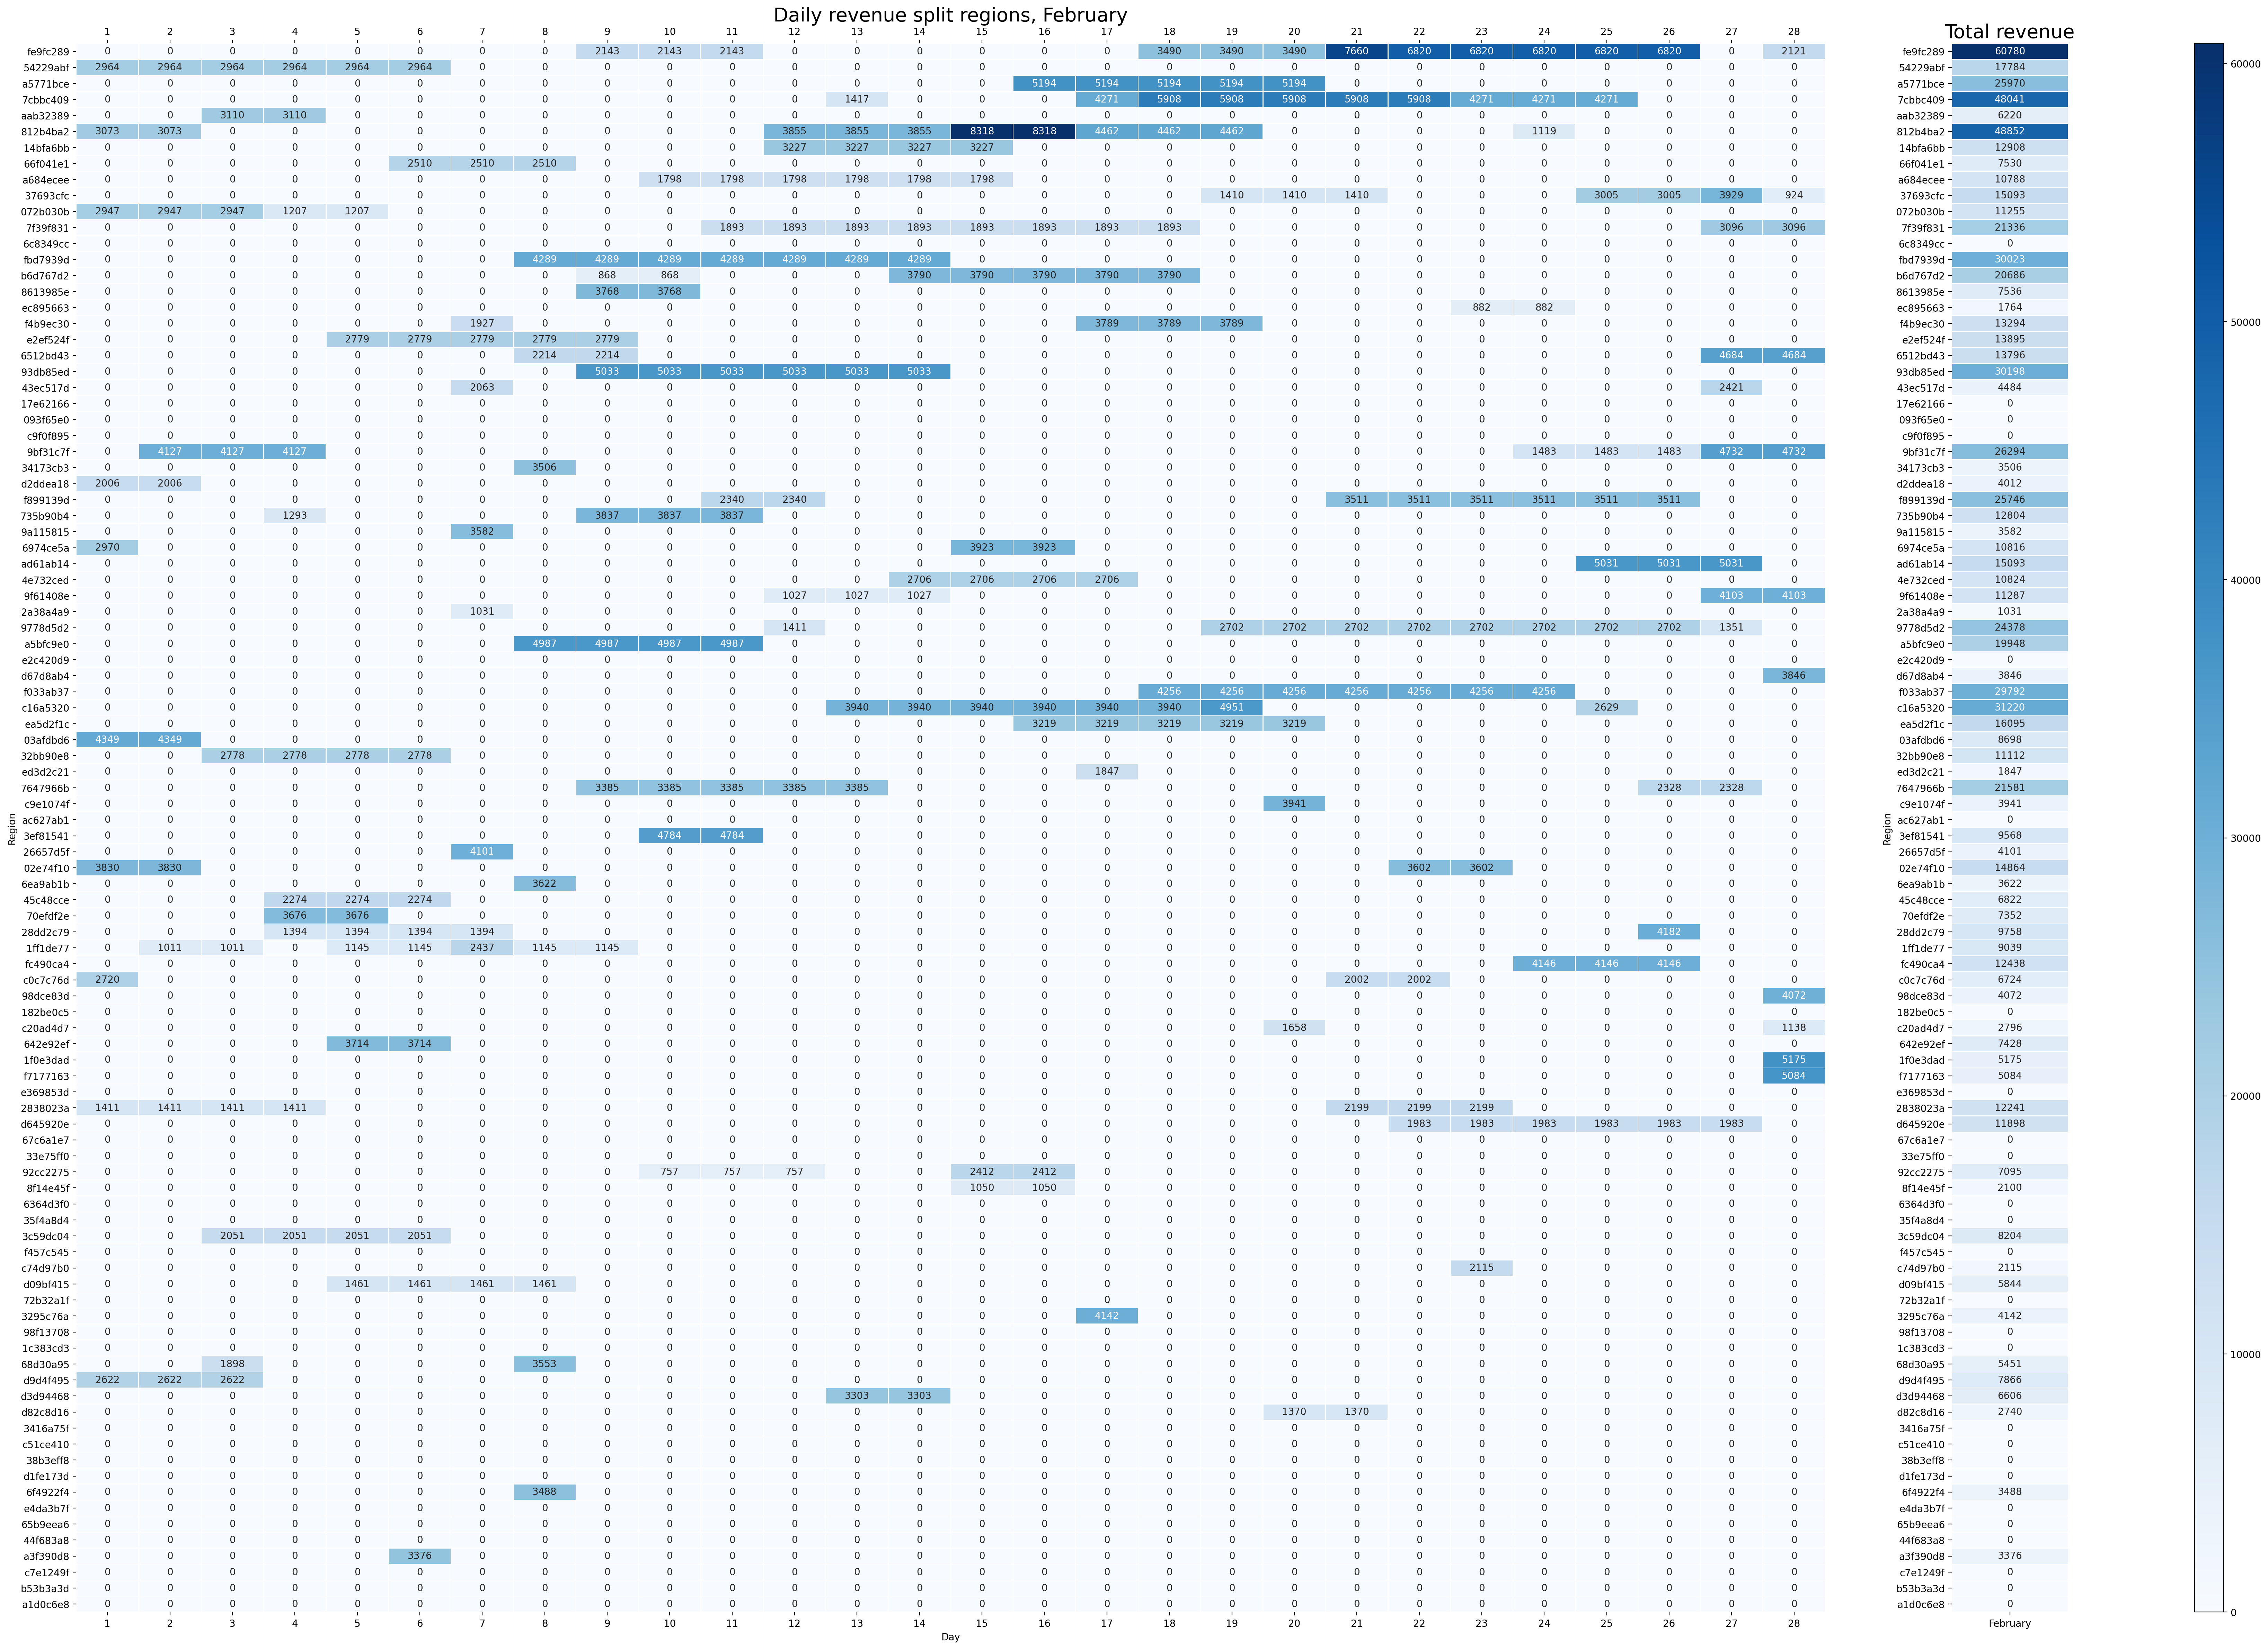

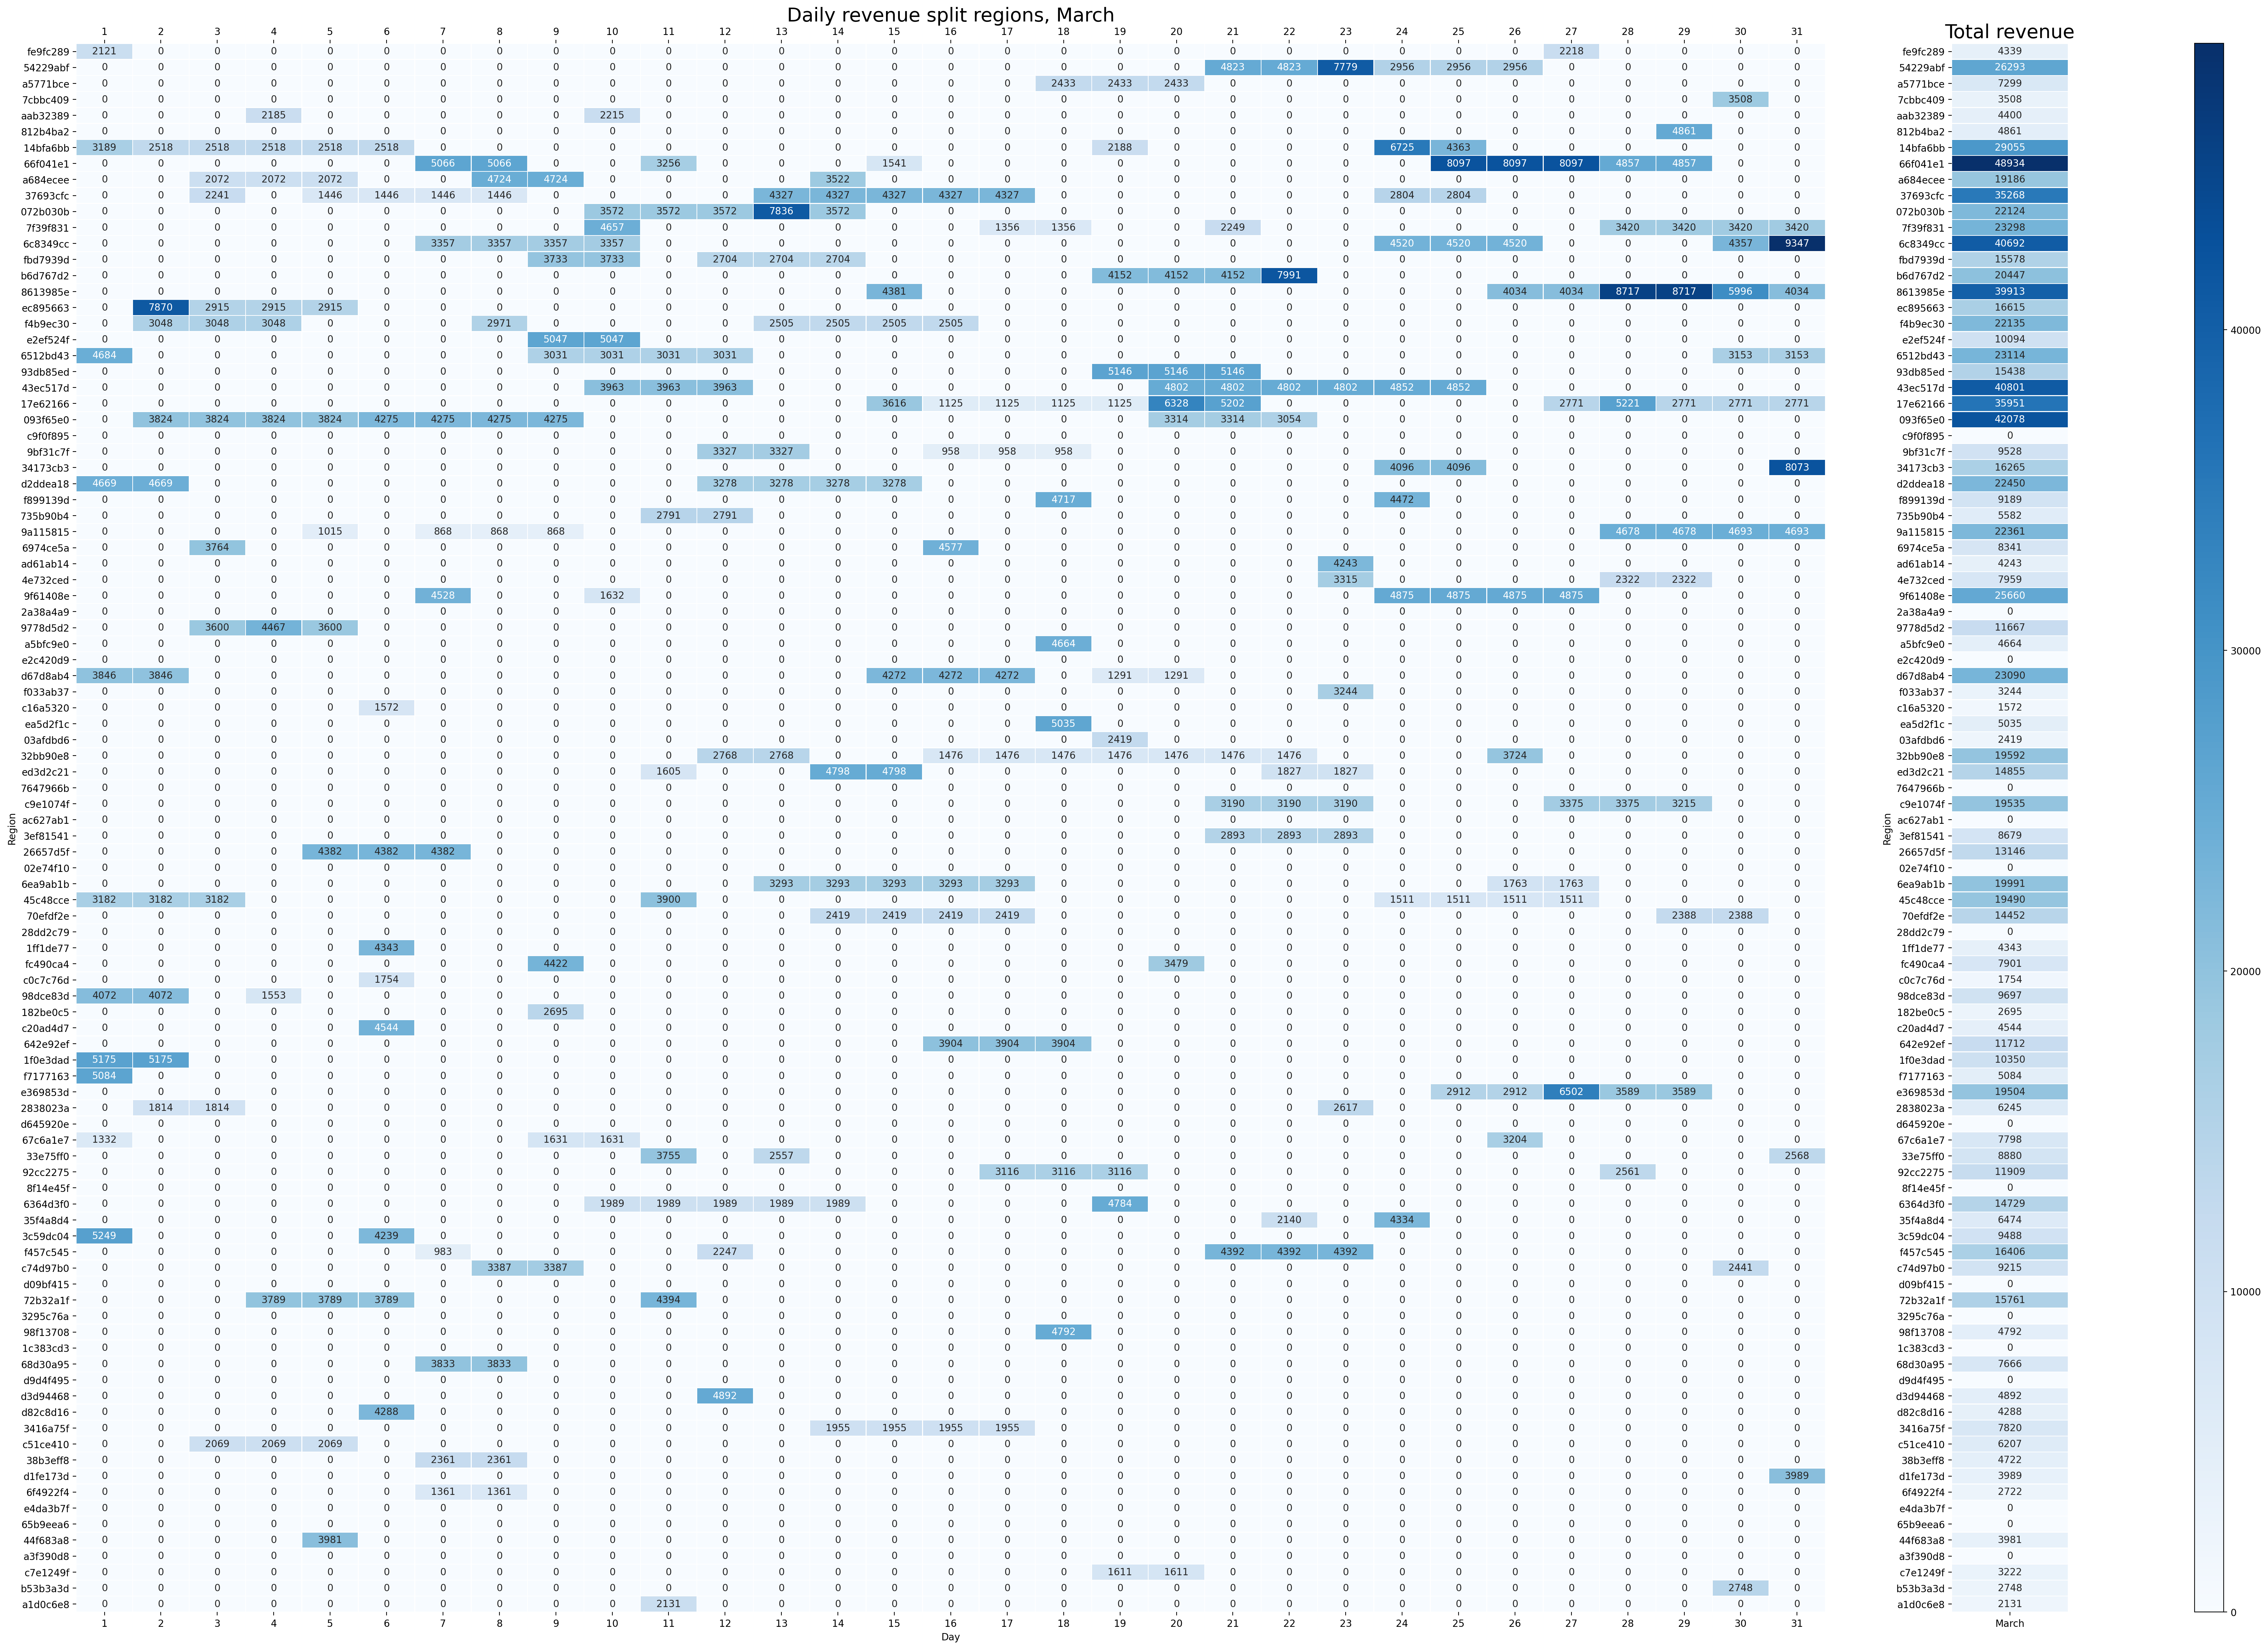

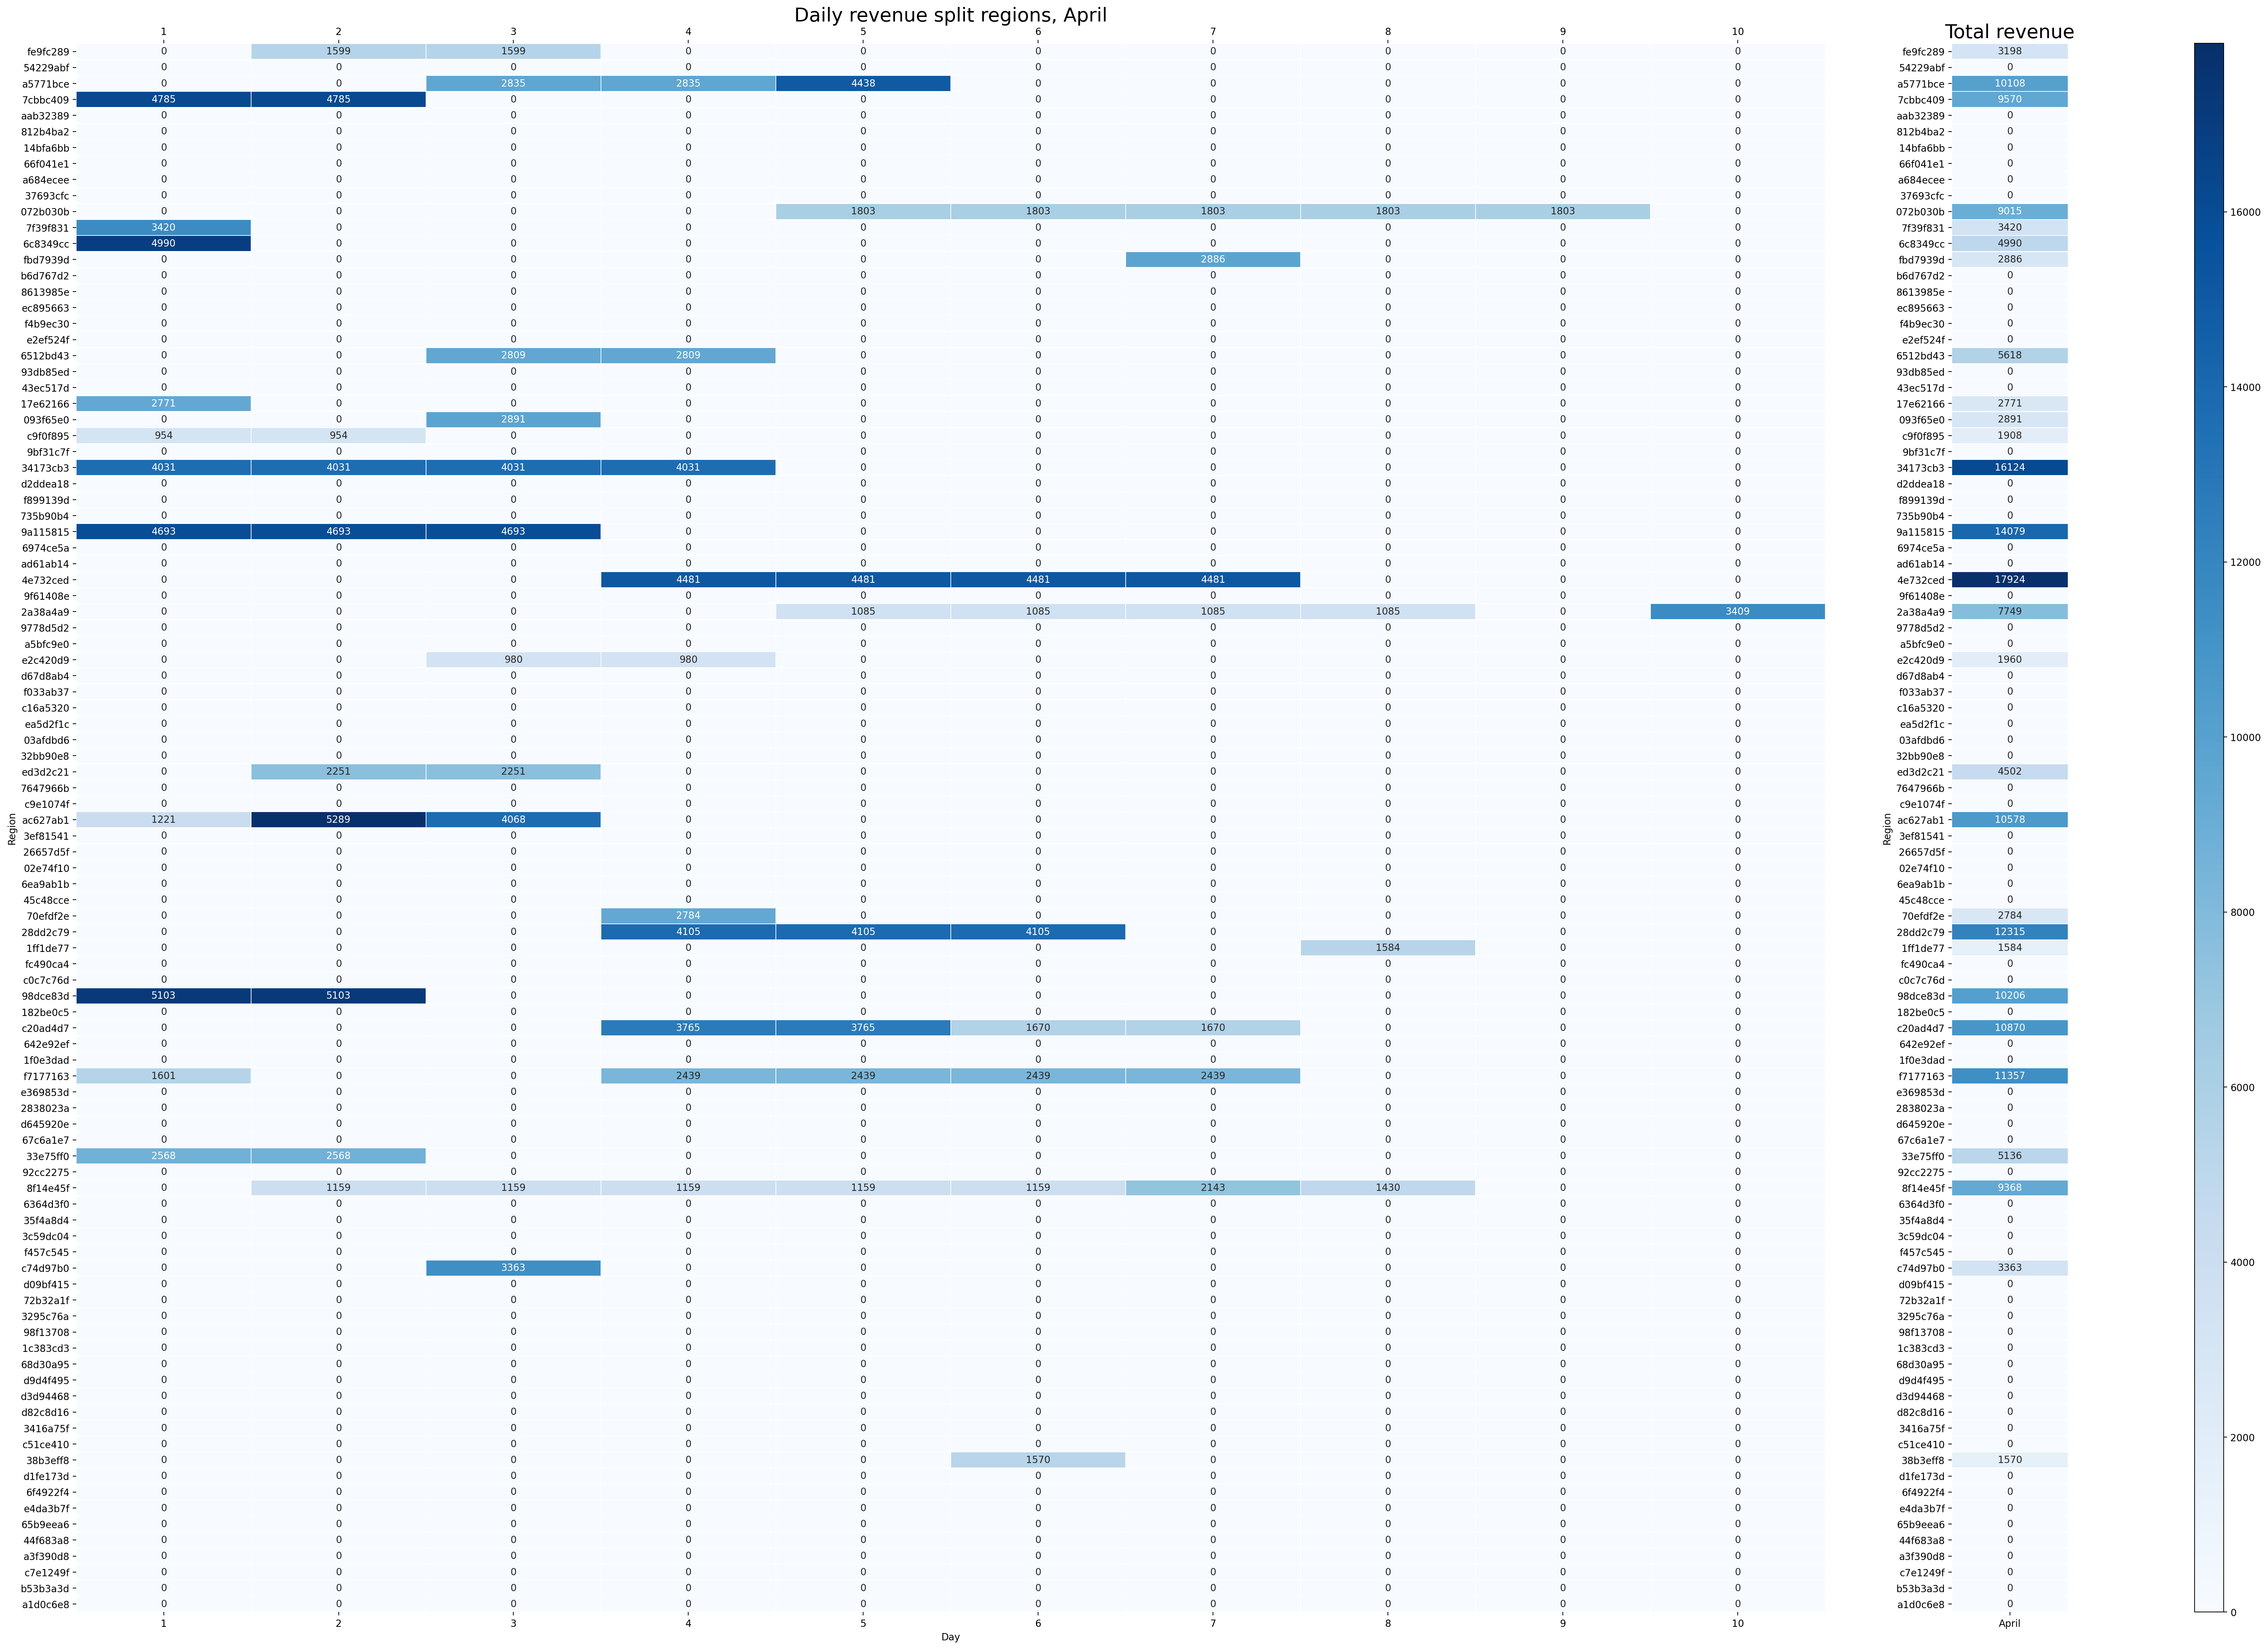

In [40]:
#df_matrix = daily_revenue_split_regions
#df_total = Total sum of each split unit
#heat_m_title = 'Daily revenue split regions'
#total_bar_title = 'Total revenue'
#ylabel = 'Region'
#cmap = "Blues"

heat_map_split_smth(daily_revenue_split_regions,
                    total_res,
                    'Daily revenue split regions',
                    'Total revenue',
                    'Region',
                    'Blues',
                    figsize=(40,30),
                    heat_yticklabels = True,
                    bar_yticklabels = True)

In [41]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# for i in list(daily_revenue_split_regions.month.unique()):
#   #Фильтруем по месяцу, убираем лишние колонки месяц/день/дату, тайпкастим в инт
#   df_heat = daily_revenue_split_regions.query('month == @i ').T
#   df_heat = df_heat.rename(columns=df_heat.loc['day'])
#   df_heat = df_heat[~df_heat.index.isin(['rent_date','month','day'])]
#   df_heat = df_heat.astype('int64')


#   fig, ax = plt.subplots(ncols= 3,figsize=(40, 30), dpi= 200, gridspec_kw=dict(width_ratios=[30,2,0.5]))

#   sns.heatmap(df_heat,cmap="Blues", vmin=0 ,linewidths=.5, annot=True, fmt='g', cbar=False, yticklabels=True, ax=ax[0])
#   sns.heatmap(total_res[[i]],cmap="Blues", vmin=0 ,linewidths=.5, annot=True, fmt='g', cbar=False, yticklabels=True, ax=ax[1])

#   fig.colorbar(ax[1].collections[0], cax=ax[2])

#   ax[0].set_title(f'Daily revenue split regions, {i}',fontsize=20)
#   ax[1].set_title('Total renevue',fontsize=20)

#   ax[0].set(xlabel='Day', ylabel='Region')
#   ax[1].set(xlabel='', ylabel='Region')

#   ax[0].tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)

#   #plt.tick_params(axis='x',top=True)
#   plt.yticks(rotation=0)

## Daily revenue split carmodels

In [42]:
daily_revenue_split_carmodels = df2_grouped \
.explode('unique_date') \
.pivot_table(index=['car_id'],
             columns='unique_date',
             values='day_cost',
             aggfunc='sum',
             fill_value=0)

In [43]:
daily_revenue_split_carmodels

unique_date                       2019-01-02  2019-01-03  2019-01-04  2019-01-05  2019-01-06  2019-01-07  2019-01-08  2019-01-09  2019-01-10  2019-01-11  2019-01-12  2019-01-13  2019-01-14  2019-01-15  2019-01-16  2019-01-17  2019-01-18  2019-01-19  2019-01-20  2019-01-21  2019-01-22  2019-01-23  2019-01-24  2019-01-25  2019-01-26  2019-01-27  2019-01-28  2019-01-29  2019-01-30  2019-01-31  2019-02-01  2019-02-02  2019-02-03  2019-02-04  2019-02-05  2019-02-06  2019-02-07  2019-02-08  2019-02-09  2019-02-10  2019-02-11  2019-02-12  2019-02-13  2019-02-14  2019-02-15  2019-02-16  2019-02-17  2019-02-18  2019-02-19  2019-02-20  2019-02-21  2019-02-22  2019-02-23  2019-02-24  2019-02-25  2019-02-26  2019-02-27  2019-02-28  2019-03-01  2019-03-02  2019-03-03  2019-03-04  2019-03-05  2019-03-06  2019-03-07  2019-03-08  2019-03-09  2019-03-10  2019-03-11  2019-03-12  2019-03-13  2019-03-14  2019-03-15  2019-03-16  2019-03-17  2019-03-18  2019-03-19  2019-03-20  2019-03-21  2019-03-22  2019-03-23  2019-03-24  2019-03-25  2019-03-26  2019-03-27  2019-03-28  2019-03-29  2019-03-30  2019-03-31  2019-04-01  2019-04-02  2019-04-03  2019-04-04  2019-04-05  2019-04-06  2019-04-07  2019-04-08  2019-04-09  2019-04-10
car_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
2723d092b63885e0d7c260cc007e8b9d  0.0         0.0         2537.3      2537.3      1597.1      1597.1      2170.8      2170.8      2170.8      2170.8      1122.3      4153.2      4153.2      4153.2      4153.2      1910.2      1910.2      1910.2      1910.2      3973.1      3973.1      3973.1      2780.0      2780.0      4096.3      3200.6      3200.6      2720.7      2720.7      2720.7      2720.7      4127.9      4127.9      4127.9      2779.0      2779.0      2779.0      2779.0      2779.0      4784.7      4784.7      1027.0      1027.0      1027.0      4462.8      4462.8      4462.8      4462.8      4462.8      1658.3      4170.0      4170.0      4170.0      4170.0      4170.0      4170.0      3096.3      3096.3      3189.5      3048.1      3048.1      3048.1      3981.0      4239.3      2361.5      2361.5      1631.1      1631.1      3256.4      3278.2      3278.2      3278.2      3278.2      958.8       958.8       958.8       2188.5      5202.2      5202.2      3839.0      2617.2      4852.7      4852.7      1763.3      1763.3      2449.8      4861.8      4693.3      4693.3      4693.3      4693.3      4693.3      4105.0      4105.0      4105.0      2143.0      0.0         0.0         0.0       
2b44928ae11fb9384c4cf38708677c48  0.0         0.0         0.0         0.0         0.0         0.0         1720.7      1720.7      4976.3      4976.3      4976.3      1680.4      1680.4      1680.4      2290.5      2290.5      2290.5      2531.9      2531.9      2531.9      2531.9      2531.9      1565.1      1565.1      1565.1      221

In [44]:
daily_revenue_split_carmodels.columns.name=None
daily_revenue_split_carmodels.reset_index(inplace=True)

In [45]:
temp_car = daily_revenue_split_carmodels.T.reset_index().rename(columns=daily_revenue_split_carmodels.T.reset_index().iloc[0]).drop(0, axis=0)
temp_car = temp_car.rename(columns={'car_id':'date_revenue'})
temp_car.date_revenue = temp_car.date_revenue.astype('datetime64[ns]')
temp_car['month'] = temp_car.date_revenue.dt.month_name()
temp_car['day'] = temp_car.date_revenue.dt.day

In [46]:
total_car_res = pd.DataFrame(index = (temp_car[temp_car.columns.difference(['date_revenue','month','day'])]).T.index)
for i in list(temp_car.month.unique()):
  index = (temp_car.query('month == @i')[temp_car.query('month == @i').columns.difference(['date_revenue','month','day'])]).T.index
  total_car_res[i] = index.map((temp_car.query('month == @i')[temp_car.query('month == @i').columns.difference(['date_revenue','month','day'])].astype('int64').sum()))

total_car_res['Total'] = total_car_res.sum(axis=1)
total_car_res = total_car_res.sort_values(ascending=False, by='Total')

In [47]:
daily_revenue_split_carmodels['Total'] = daily_revenue_split_carmodels.sum(axis=1)
daily_revenue_split_carmodels.sort_values('Total', ascending=False, inplace=True)
daily_revenue_split_carmodels.reset_index(inplace=True)
daily_revenue_split_carmodels.drop(['index'], axis=1, inplace=True)
daily_revenue_split_carmodels = daily_revenue_split_carmodels.set_index(['car_id'])
daily_revenue_split_carmodels.index.name = None
daily_revenue_split_carmodels_total = daily_revenue_split_carmodels[['Total']]
daily_revenue_split_carmodels.drop(['Total'], axis=1, inplace=True)

In [48]:
daily_revenue_split_carmodels

2019-01-02  2019-01-03  2019-01-04  2019-01-05  2019-01-06  2019-01-07  2019-01-08  2019-01-09  2019-01-10  2019-01-11  2019-01-12  2019-01-13  2019-01-14  2019-01-15  2019-01-16  2019-01-17  2019-01-18  2019-01-19  2019-01-20  2019-01-21  2019-01-22  2019-01-23  2019-01-24  2019-01-25  2019-01-26  2019-01-27  2019-01-28  2019-01-29  2019-01-30  2019-01-31  2019-02-01  2019-02-02  2019-02-03  2019-02-04  2019-02-05  2019-02-06  2019-02-07  2019-02-08  2019-02-09  2019-02-10  2019-02-11  2019-02-12  2019-02-13  2019-02-14  2019-02-15  2019-02-16  2019-02-17  2019-02-18  2019-02-19  2019-02-20  2019-02-21  2019-02-22  2019-02-23  2019-02-24  2019-02-25  2019-02-26  2019-02-27  2019-02-28  2019-03-01  2019-03-02  2019-03-03  2019-03-04  2019-03-05  2019-03-06  2019-03-07  2019-03-08  2019-03-09  2019-03-10  2019-03-11  2019-03-12  2019-03-13  2019-03-14  2019-03-15  2019-03-16  2019-03-17  2019-03-18  2019-03-19  2019-03-20  2019-03-21  2019-03-22  2019-03-23  2019-03-24  2019-03-25  2019-03-26  2019-03-27  2019-03-28  2019-03-29  2019-03-30  2019-03-31  2019-04-01  2019-04-02  2019-04-03  2019-04-04  2019-04-05  2019-04-06  2019-04-07  2019-04-08  2019-04-09  2019-04-10
698d51a19d8a121ce581499d7b701668  0.0         1991.9      2046.7      2873.4      2873.4      2873.4      2873.4      2873.4      2873.4      2873.4      1068.1      3884.9      3884.9      3884.9      4656.6      4656.6      4656.6      4656.6      4656.6      4656.6      4656.6      4656.6      4656.6      2734.4      2984.6      2984.6      4569.7      4569.7      4569.7      2787.4      1207.3      1207.3      1207.3      1207.3      1207.3      3376.8      1031.2      4289.2      4289.2      4289.2      4289.2      4289.2      4289.2      4289.2      1050.9      1050.9      3789.5      3789.5      3789.5      3941.5      2199.5      2199.5      2199.5      4146.5      4146.5      4146.5      4103.8      4103.8      5249.1      2915.3      2915.3      2915.3      2915.3      4544.1      983.5       2971.4      3031.8      3031.8      3031.8      3031.8      4327.5      4327.5      4327.5      4327.5      4327.5      4717.2      4152.1      4152.1      4152.1      4152.1      4243.1      4096.0      4096.0      3204.1      3375.4      3375.4      3215.3      4357.3      4357.3      954.6       954.6       980.0       980.0       1085.4      1085.4      1085.4      1085.4      0.0         0.0       
a3c65c2974270fd093ee8a9bf8ae7d0b  0.0         2309.2      3034.2      1260.3      1260.3      1260.3      1260.3      1260.3      1260.3      1452.3      4599.4      4599.4      4599.4      4599.4      4599.4      4599.4      4599.4      1944.5      1960.5      1960.5      1960.5      1960.5      1960.5      2970.0      2970.0      2970.0      2970.0      2970.0      2970.0      2970.0      2970.0      1011.6      1011.6      1293.9      1145.4      1145.4      1145.4      1145.4      1145.4      1798.5      1798.5      1798.5      1798.5      1798.5      1798.5      5194.7      5194.7      5194.7      5194.7      5194.7      3511.1      3511.1      3511.1      3511.1      3511.1      3511.1      4684.5      4684.5      4684.5      4955.1      2069.7      2069.7      2069.7      1754.1      3833.2      3833.2      4422.2      3572.8      3572.8      3572.8      3572.8      3572.8      4381.0      4577.0      1356.3      1356.3      4784.1      3479.7      4392.0      4392.0      4392.0      4875.0      4875.0      4875.0      4875.0      4682.7      4682.7      2748.9      4041.2      4785.7      4785.7      2809.3      2809.3      1803.5      1803.5      1803.5      1803.5      1803.5      3409.4    
2723d092b63885e0d7c260cc007e8b9d  0.0         0.0         2537.3      2537.3      1597.1      1597.1      2170.8      2170.8      2170.8      2170.8      1122.3      4153.2      4153.2      4153.2      4153.2      1910.2      1910.2      1910.2      1910.2      3973.1      3973.1      3973.1      2780.0      2780.0      4096.3      3200.6      3200.6      2720.7      2

In [49]:
daily_revenue_split_carmodels = daily_revenue_split_carmodels.T
daily_revenue_split_carmodels = daily_revenue_split_carmodels \
.reset_index() \
.rename(columns={'index':'rent_date'})

daily_revenue_split_carmodels.rent_date = daily_revenue_split_carmodels.rent_date.astype('datetime64[ns]')
daily_revenue_split_carmodels['month'] = daily_revenue_split_carmodels.rent_date.dt.month_name()
daily_revenue_split_carmodels['day'] = daily_revenue_split_carmodels.rent_date.dt.day

In [50]:
daily_revenue_split_carmodels

rent_date  698d51a19d8a121ce581499d7b701668  a3c65c2974270fd093ee8a9bf8ae7d0b  2723d092b63885e0d7c260cc007e8b9d  f0935e4cd5920aa6c7c996a5ee53a70f  7f6ffaa6bb0b408017b62254211691b5  2b44928ae11fb9384c4cf38708677c48  5fd0b37cd7dbbb00f97ba6ce92bf5add  73278a4a86960eeb576a8fd4c9ec6997  65b9eea6e1cc6bb9f0cd2a47751a186f  5f93f983524def3dca464469d2cf9f3e  a97da629b098b75c294dffdc3e463904    month  day
0  2019-01-02  0.0                               0.0                               0.0                               0.0                               0.0                               0.0                               1299.9                            0.0                               0.0                               2357.7                            2209.4                            January  2  
1  2019-01-03  1991.9                            2309.2                            0.0                               3233.5                            0.0                               0.0                               1299.9                            2824.3                            0.0                               2983.0                            2209.4                            January  3  
2  2019-01-04  2046.7                            3034.2                            2537.3                            3233.5                            0.0                               0.0                               1299.9                            2824.3                            3111.0                            2983.0                            2209.4                            January  4  
3  2019-01-05  2873.4                            1260.3                            2537.3                            2627.3                            2718.1                            0.0                               1299.9                            2824.3                            1923.4                            2983.0                            2209.4                            January  5  
4  2019-01-06  2873.4                            1260.3                            1597.1                            2627.3                            2718.1                            0.0                               1299.9                            2247.0                            1923.4                            2983.0                            2209.4                            January  6  
..        ...     ...                               ...                               ...                               ...                               ...                            ...                                  ...                               ...                               ...                               ...                               ...                                ... ..  
94 2019-04-06  1085.4                            1803.5                            4105.0                            0.0                               4481.2                            0.0                               1570.9                            1670.4                            0.0                               2439.1                            1159.3                            April    6  
95 2019-04-07  1085.4                            1803.5                            2143.0                            0.0                               4481.2                            0.0                               0.0                               1670.4                            0.0                               2439.1                            2886.7                            April    7  
96 2019-04-08  1085.4                            1803.5                            0.0                               0.0                               0.0                               0.0                               0.0                               1584.1                            0.0                               0.0                               1430.2                         

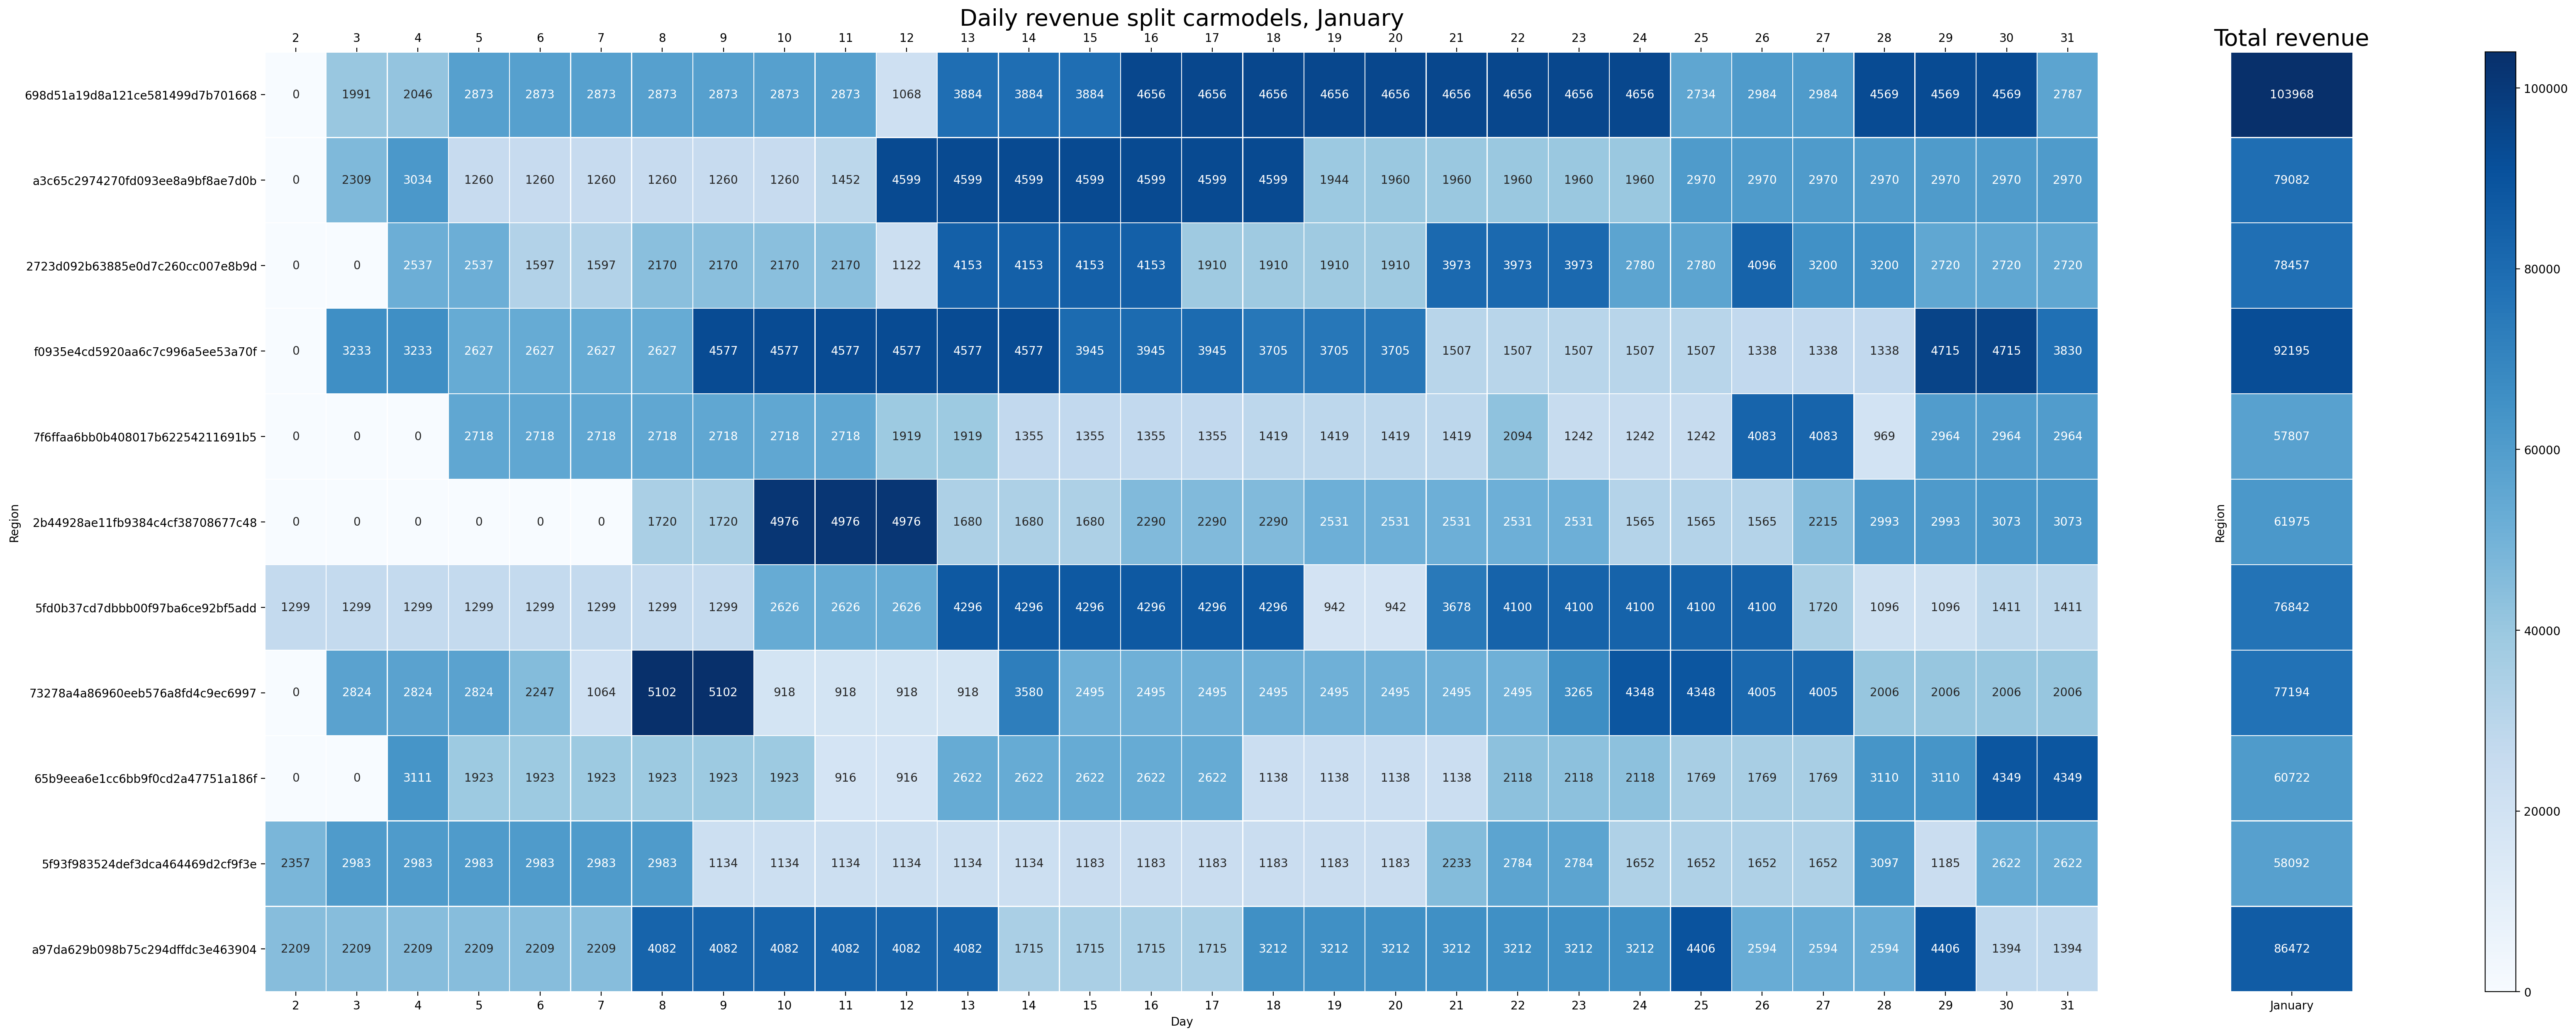

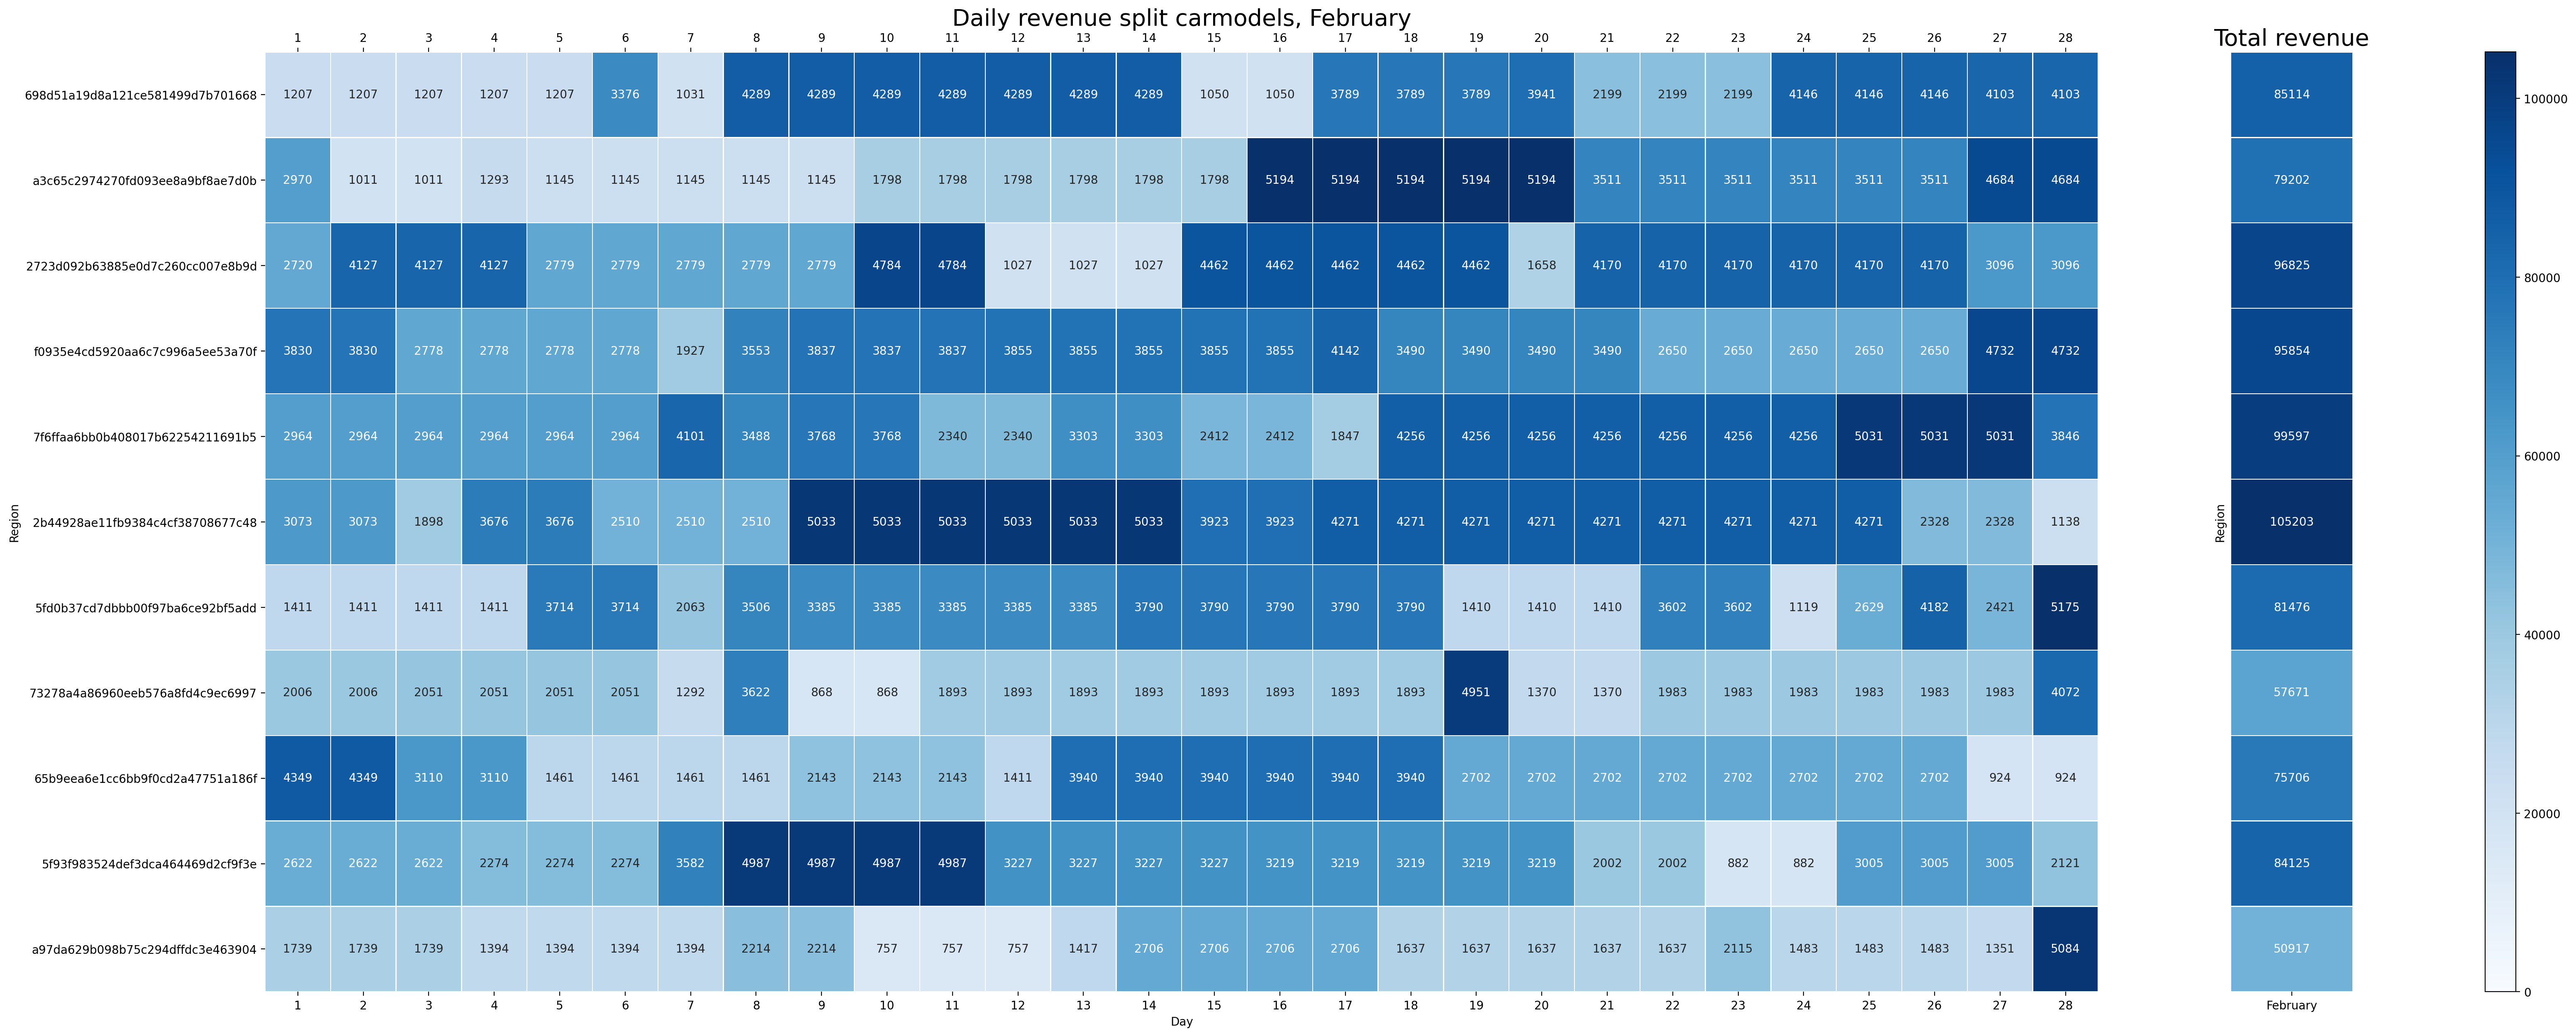

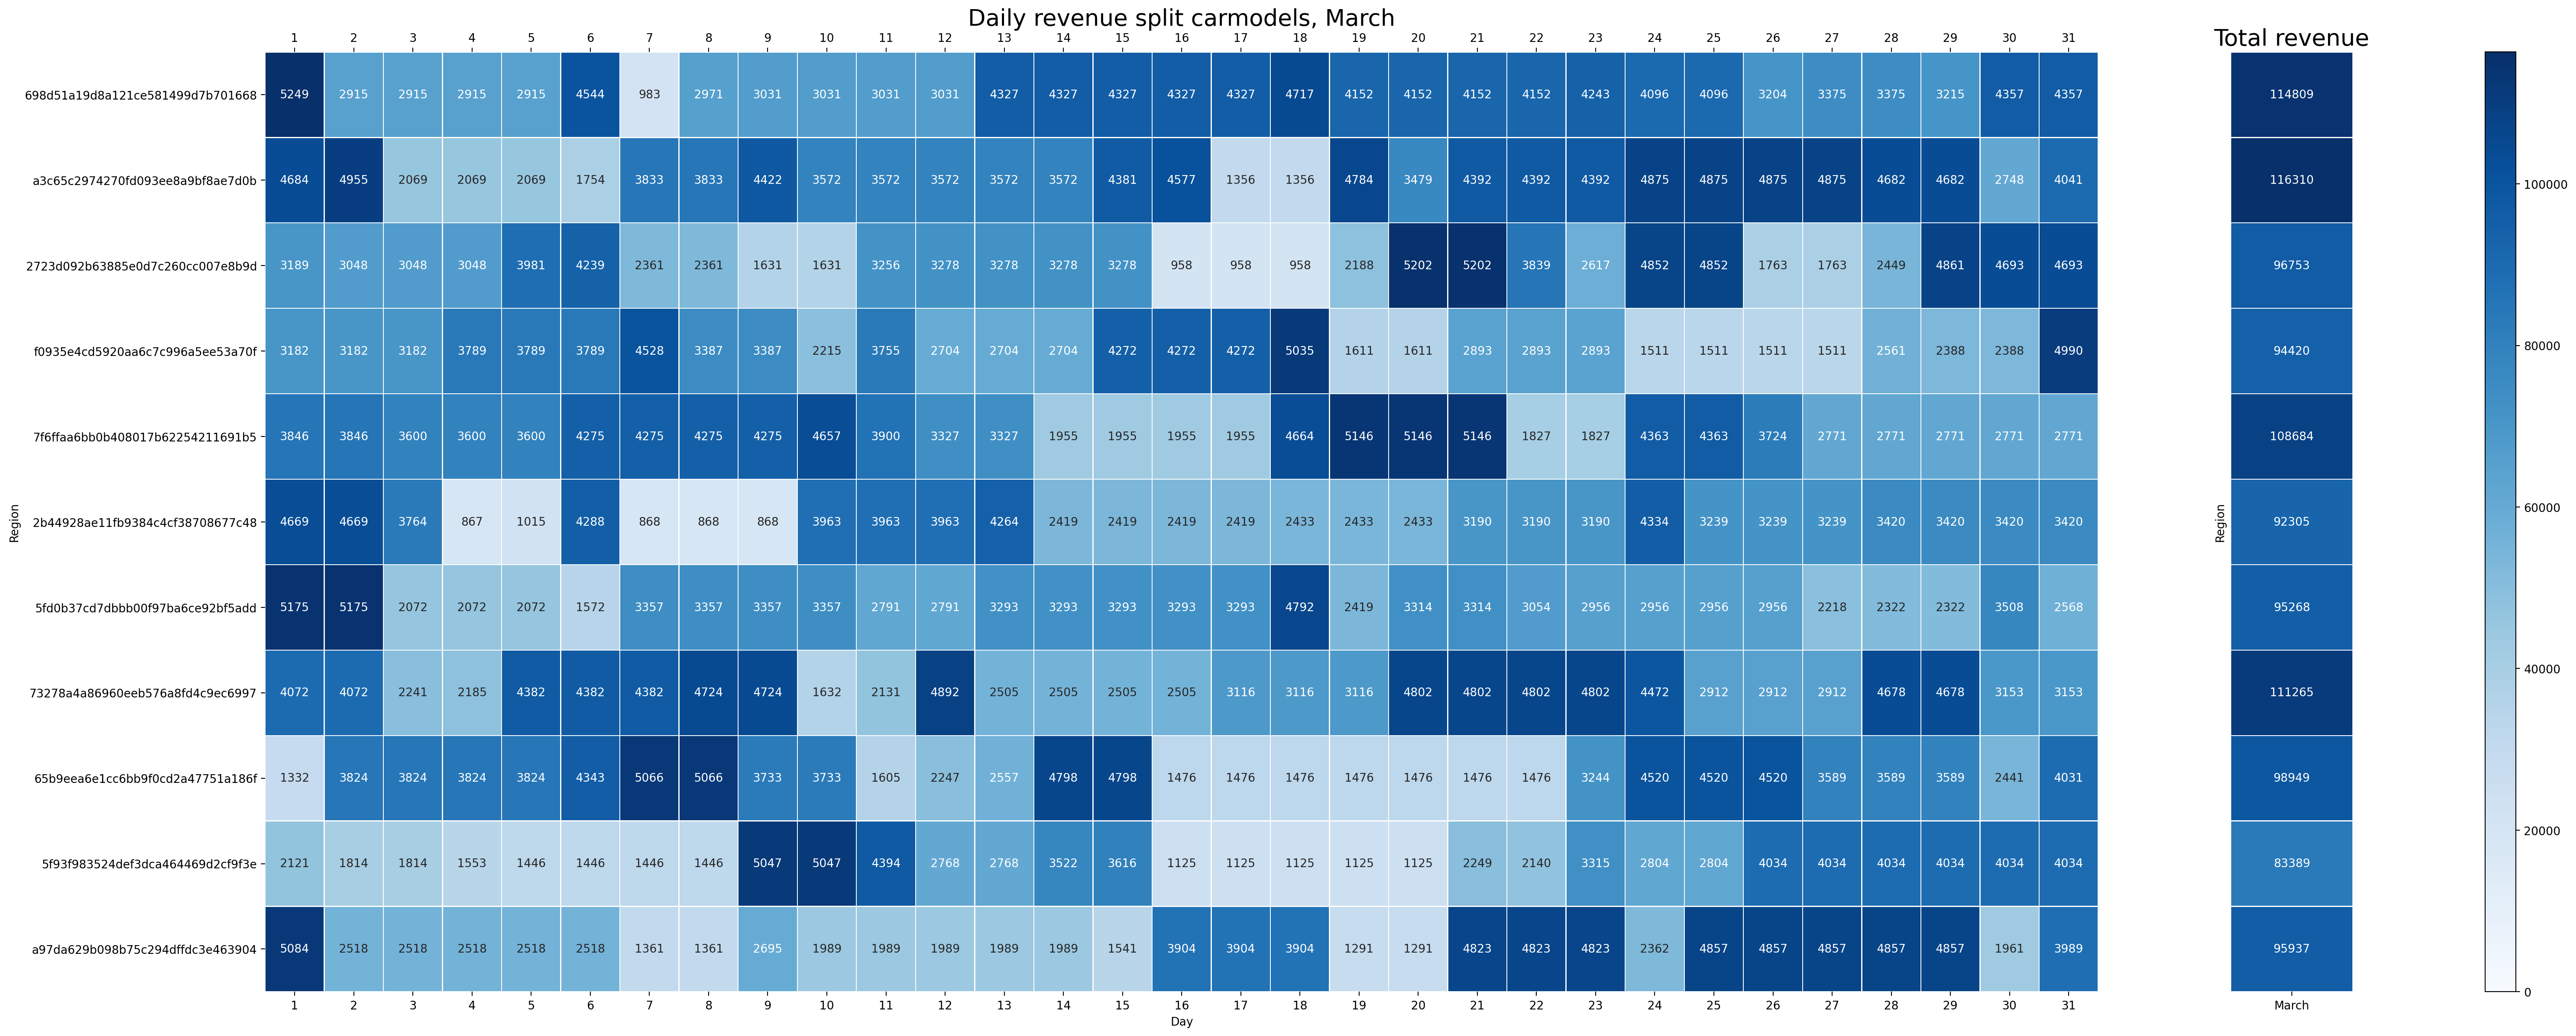

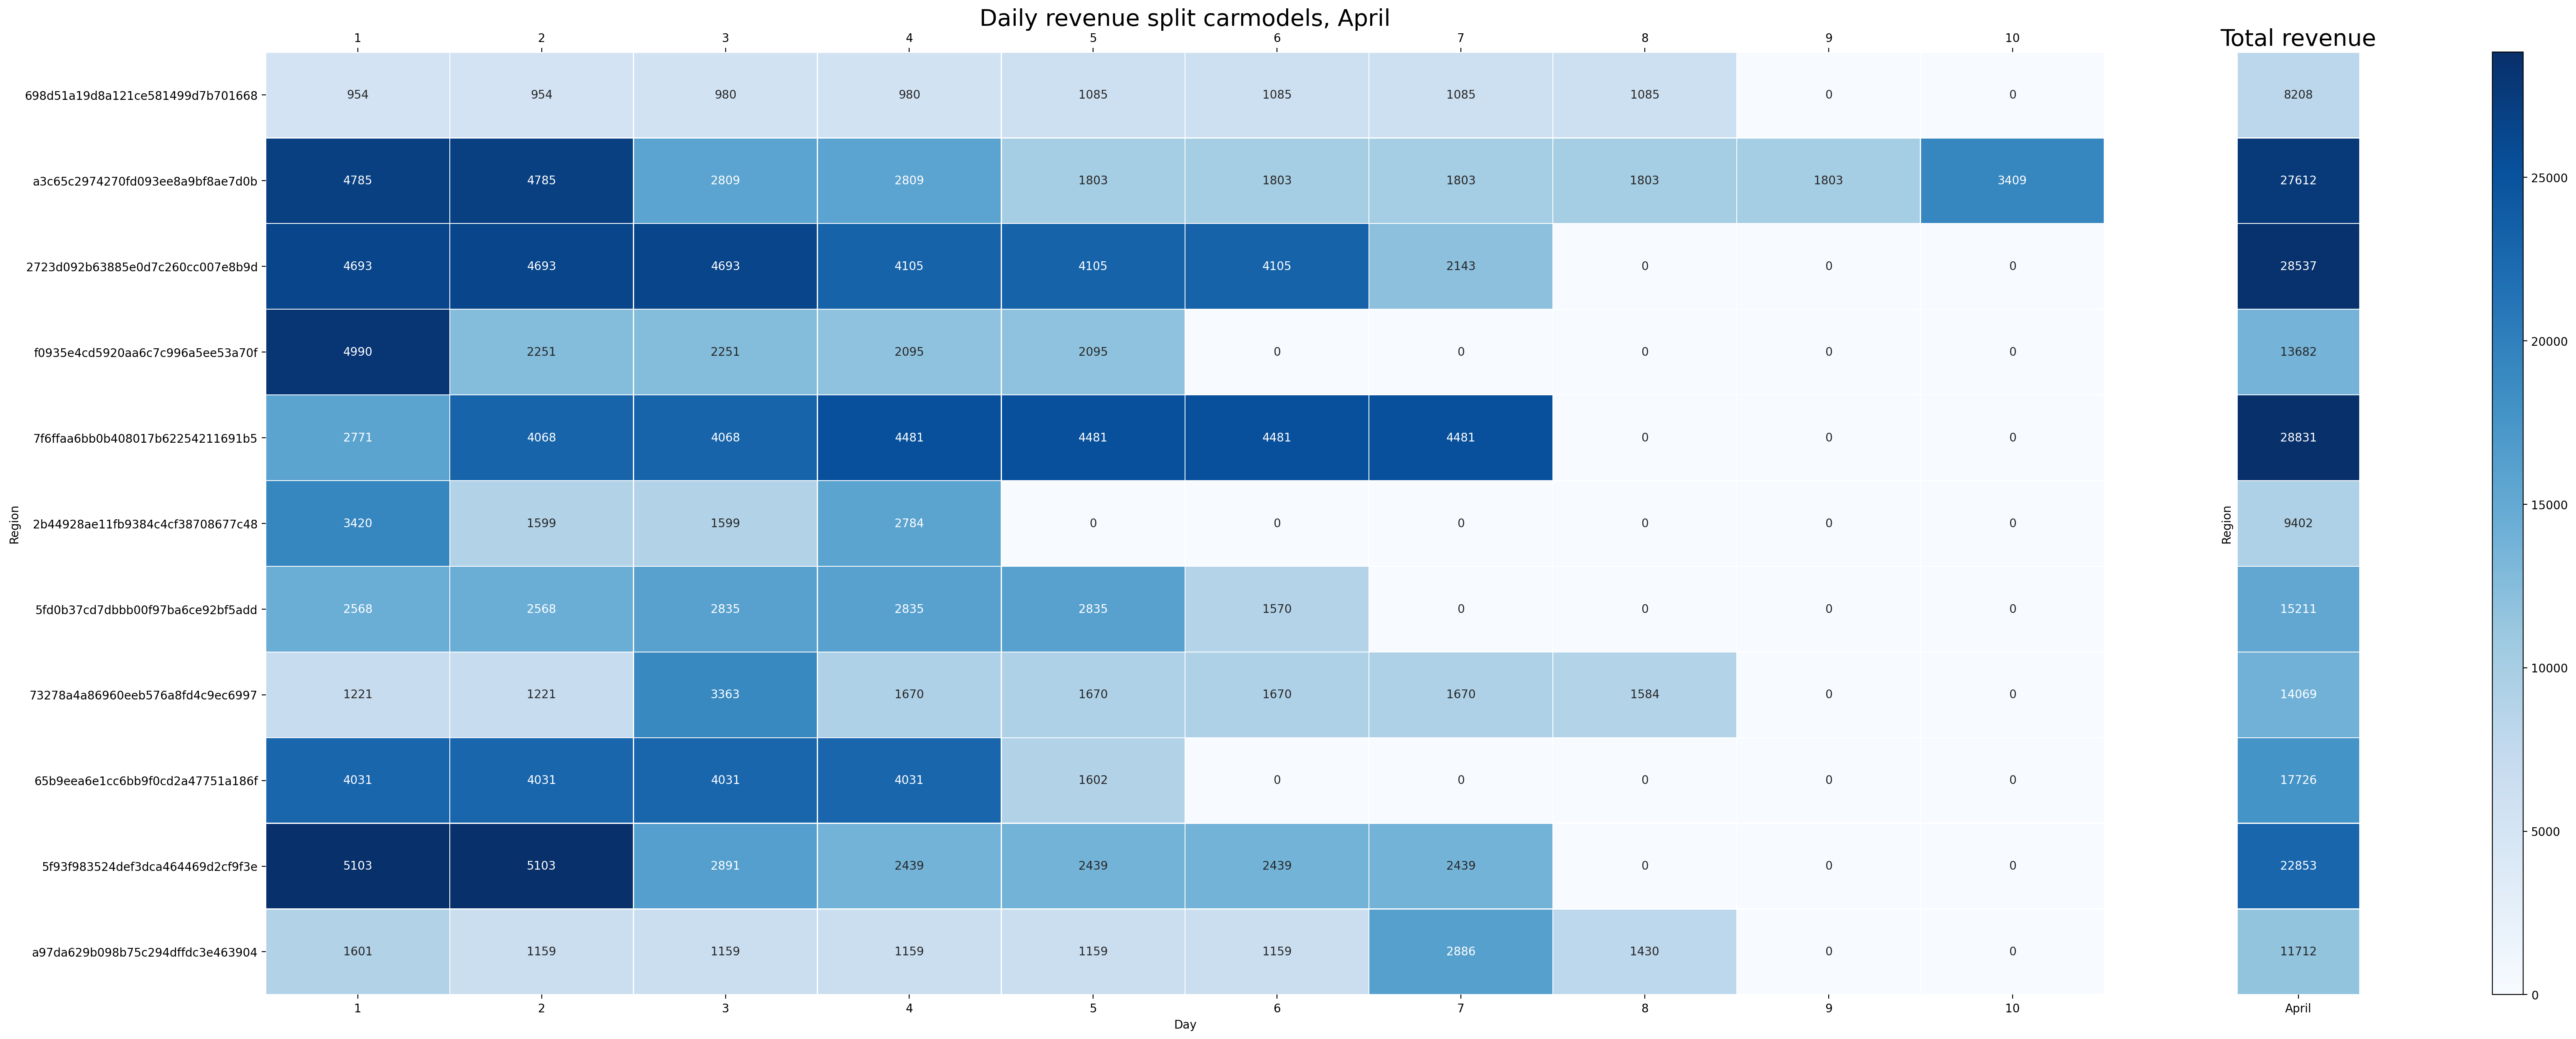

In [51]:
heat_map_split_smth(daily_revenue_split_carmodels,
                    total_car_res,
                    'Daily revenue split carmodels',
                    'Total revenue',
                    'Region',
                    'Blues',
                    figsize=(35,15),
                    heat_yticklabels = True,
                    bar_yticklabels = False)

## Daily active users 

In [52]:
df2_grouped

car_id   rent_created_date rent_start   rent_end city_name                         user_name     rent_cost                                                                                               list_dates_list                                                                                                 repeated_date                                                   unique_date  repeated_date_count  full_date_count  unique_date_count  compensation   rent_date    fixed_cost  day_cost
0     2723d092b63885e0d7c260cc007e8b9d 2019-01-01 07:06:47 2019-02-12 2019-02-14  9f61408e  d2ddea18f00665ce8623e36bd4e3c7c5  3081.009321   [2019-02-12, 2019-02-13, 2019-02-14]                                                                          0                                                                                                             [2019-02-12, 2019-02-13, 2019-02-14]                          0                    3                3                  0.000000      2019-01-01  3081.009321   1027.0  
1     2723d092b63885e0d7c260cc007e8b9d 2019-01-01 08:12:20 2019-01-29 2019-02-01  c0c7c76d  4f4adcbf8c6f66dcfc8a3282ac2bf10a  10882.612534  [2019-01-29, 2019-01-30, 2019-01-31, 2019-02-01]                                                              0                                                                                                             [2019-01-29, 2019-01-30, 2019-01-31, 2019-02-01]              0                    4                4                  0.000000      2019-01-01  10882.612534  2720.7  
2     2723d092b63885e0d7c260cc007e8b9d 2019-01-01 12:44:23 2019-02-05 2019-02-09  e2ef524f  d82c8d1619ad8176d665453cfb2e55f0  13894.964416  [2019-02-05, 2019-02-06, 2019-02-07, 2019-02-08, 2019-02-09]                                                  0                                                                                                             [2019-02-05, 2019-02-06, 2019-02-07, 2019-02-08, 2019-02-09]  0                    5                5                  0.000000      2019-01-01  13894.964416  2779.0  
3     2723d092b63885e0d7c260cc007e8b9d 2019-01-01 13:20:06 2019-02-12 2019-02-19  812b4ba2  428fca9bc1921c25c5121f9da7815cde  35702.048589  [2019-02-12, 2019-02-13, 2019-02-14, 2019-02-15, 2019-02-16, 2019-02-17, 2019-02-18, 2019-02-19]              [2019-02-14, 2019-02-12, 2019-02-13]                                                                          [2019-02-15, 2019-02-18, 2019-02-19, 2019-02-16, 2019-02-17]  3                    8                5                  13388.268221  2019-01-01  22313.780368  4462.8  
4     2723d092b63885e0d7c260cc007e8b9d 2019-01-01 15:23:43 2019-01-08 2019-01-11  d645920e  5b8add2a5d98b1a652ea7fd72d942dac  8683.251321   [2019-01-08, 2019-01-09, 2019-01-10, 2019-01-11]                                                              0                                                                                                             [2019-01-08, 2019-01-09, 2019-01-10, 2019-01-11]              0                    4                4                  0.000000      2019-01-01  8683.251321   2170.8  
...                                ...                 ...        ...        ...       ...                               ...          ...                                                ...                                                             ..                                                                                                                                                          ...             ..                   ..               ..                       ...             ...          ...      ...  
9995  f0935e4cd5920aa6c7c996a5ee53a70f 2019-02-11 11:11:27 2019-03-11 2019-03-14  6364d3f0  d395771085aab05244a4fb8fd91bf4ee  5702.599769   [2019-03-11, 2019-03-12, 2019-03-13, 2019-03-14]                                                              [2019-03-11, 2019-03-12, 2019-03-13, 2019-03-14]                                      

In [53]:
active_users = df2_grouped \
.explode('unique_date') \
.pivot_table(index=['user_name'],
             columns='unique_date',
             values='day_cost',
             aggfunc='count',
             fill_value=0) \


In [54]:
active_users.groupby(['2019-01-02']).sum()

unique_date     0  2019-01-03  2019-01-04  2019-01-05  2019-01-06  2019-01-07  2019-01-08  2019-01-09  2019-01-10  2019-01-11  2019-01-12  2019-01-13  2019-01-14  2019-01-15  2019-01-16  2019-01-17  2019-01-18  2019-01-19  2019-01-20  2019-01-21  2019-01-22  2019-01-23  2019-01-24  2019-01-25  2019-01-26  2019-01-27  2019-01-28  2019-01-29  2019-01-30  2019-01-31  2019-02-01  2019-02-02  2019-02-03  2019-02-04  2019-02-05  2019-02-06  2019-02-07  2019-02-08  2019-02-09  2019-02-10  2019-02-11  2019-02-12  2019-02-13  2019-02-14  2019-02-15  2019-02-16  2019-02-17  2019-02-18  2019-02-19  2019-02-20  2019-02-21  2019-02-22  2019-02-23  2019-02-24  2019-02-25  2019-02-26  2019-02-27  2019-02-28  2019-03-01  2019-03-02  2019-03-03  2019-03-04  2019-03-05  2019-03-06  2019-03-07  2019-03-08  2019-03-09  2019-03-10  2019-03-11  2019-03-12  2019-03-13  2019-03-14  2019-03-15  2019-03-16  2019-03-17  2019-03-18  2019-03-19  2019-03-20  2019-03-21  2019-03-22  2019-03-23  2019-03-24  2019-03-25  2019-03-26  2019-03-27  2019-03-28  2019-03-29  2019-03-30  2019-03-31  2019-04-01  2019-04-02  2019-04-03  2019-04-04  2019-04-05  2019-04-06  2019-04-07  2019-04-08  2019-04-09  2019-04-10
2019-01-02                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
0            9554  5           7           8           8           8           10          10          11          11          11          11          11          11          11          11          11          11          11          11          11          11          10          10          11          11          11          11          11          11          11          10          10          10          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          10          10          10          11          11          11          11          11          11          11          11          11          11          11          11          11          11          11          10          8           7           4           1           1         
1            58    2           2           2           2           2           1           1           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           1           0           0           0           0           0           0           0           1           1           1           0  

In [55]:
active_users.columns.name = None
active_users.index.name = None

In [56]:
active_users.drop(0, axis=1, inplace=True)

In [57]:
active_users.reset_index(inplace=True)

In [58]:
active_users.rename(columns={'index':'user_id'}, inplace=True)


In [59]:
active_users.sum().iloc[1:]

2019-01-02    3 
2019-01-03    7 
2019-01-04    9 
2019-01-05    10
2019-01-06    10
              ..
2019-04-06    8 
2019-04-07    7 
2019-04-08    4 
2019-04-09    1 
2019-04-10    1 
Length: 99, dtype: object

In [60]:
plot_active_users = active_users.sum().iloc[1:]

In [61]:
plot_active_users = pd.DataFrame(plot_active_users) \
.reset_index() \
.rename(columns={0:'user_count', 'index':'rent_date'})

In [62]:
plot_active_users.rent_date = plot_active_users.rent_date.astype('datetime64[ns]')

In [63]:
plot_active_users['month'] = plot_active_users.rent_date.dt.month_name()

In [64]:
plot_active_users['day'] = plot_active_users.rent_date.dt.day

In [65]:
plot_active_users

rent_date user_count    month  day
0  2019-01-02  3          January  2  
1  2019-01-03  7          January  3  
2  2019-01-04  9          January  4  
3  2019-01-05  10         January  5  
4  2019-01-06  10         January  6  
..        ...  ..             ... ..  
94 2019-04-06  8          April    6  
95 2019-04-07  7          April    7  
96 2019-04-08  4          April    8  
97 2019-04-09  1          April    9  
98 2019-04-10  1          April    10 

[99 rows x 4 columns]

In [66]:
plot_active_users.user_count = plot_active_users.user_count.astype('int64')

In [67]:
plot_active_users.month.unique()

array(['January', 'February', 'March', 'April'], dtype=object)

In [68]:
import plotly.express as px

def bar_plotting(df_bar):
  for i in list(df_bar.month.unique()):
    plot_df = df_bar.query('month == @i')
    fig, ax = plt.subplots(figsize=(16,10), dpi= 80)

    x = plot_df.day
    y = plot_df.user_count

    ax.bar(x, y, color='orange',alpha=0.8)
    plt.ylabel("Количество активных пользователей")
    plt.xlabel(f'Daily active users, {i}')

In [69]:
import plotly.express as px

def bar_plotting(df_bar):
  for i in list(df_bar.month.unique()):
    plot_df = df_bar.query('month == @i')
    fig = px.bar(plot_df,
                 x='day',
                 y='user_count',
                 title={'text': f'Daily activity users, {i}',
                        'y':0.9,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'}
                 )
    fig.update_layout(xaxis= dict(tickmode = 'linear'),
                      yaxis= dict(tickmode = 'linear'))

    fig.show()

In [70]:
bar_plotting(plot_active_users)

#Month revenue split regions

In [71]:
columns_sequence = list(total_car_res.columns)[:-1]
heat_plot_regions = total_car_res[total_car_res.columns.difference(['Total'])]
heat_plot_regions[columns_sequence]

January  February   March  April
698d51a19d8a121ce581499d7b701668  103968   85114     114809  8208 
a3c65c2974270fd093ee8a9bf8ae7d0b  79082    79202     116310  27612
2723d092b63885e0d7c260cc007e8b9d  78457    96825     96753   28537
f0935e4cd5920aa6c7c996a5ee53a70f  92195    95854     94420   13682
7f6ffaa6bb0b408017b62254211691b5  57807    99597     108684  28831
2b44928ae11fb9384c4cf38708677c48  61975    105203    92305   9402 
5fd0b37cd7dbbb00f97ba6ce92bf5add  76842    81476     95268   15211
73278a4a86960eeb576a8fd4c9ec6997  77194    57671     111265  14069
65b9eea6e1cc6bb9f0cd2a47751a186f  60722    75706     98949   17726
5f93f983524def3dca464469d2cf9f3e  58092    84125     83389   22853
a97da629b098b75c294dffdc3e463904  86472    50917     95937   11712

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 <a list of 7 Text major ticklabel objects>)

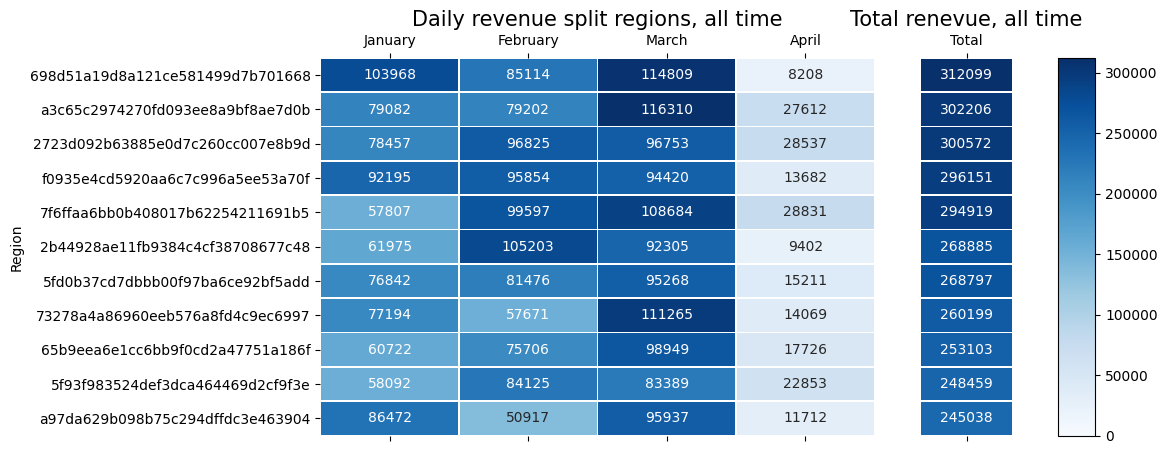

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols= 3,figsize=(10, 5), dpi= 100, gridspec_kw=dict(width_ratios=[30,5,2]))

sns.heatmap(heat_plot_regions[columns_sequence],cmap="Blues", vmin=0 ,linewidths=.5, annot=True, fmt='g', cbar=False, yticklabels=True, ax=ax[0])
sns.heatmap(total_car_res[['Total']],cmap="Blues", vmin=0 ,linewidths=.5, annot=True, fmt='g', cbar=False, yticklabels=False, ax=ax[1])

fig.colorbar(ax[1].collections[0], cax=ax[2])

ax[0].set_title(f'Daily revenue split regions, all time',fontsize=15)
ax[1].set_title('Total renevue, all time',fontsize=15)

ax[0].set(xlabel='', ylabel='Region')
ax[1].set(xlabel='', ylabel='')

ax[0].tick_params(axis="x", bottom=True, top=True, labelbottom=False, labeltop=True)
ax[1].tick_params(axis="x", bottom=True, top=True, labelbottom=False, labeltop=True)

#plt.tick_params(axis='x',top=True)
plt.yticks(rotation=0)

# Month revenue split carmodels

In [73]:
columns_sequence = list(total_res.columns)[:-1]
heat_plot = total_res[total_res.columns.difference(['Total'])]
heat_plot[columns_sequence]

January  February  March  April
fe9fc289  29182    60780     4339   3198 
54229abf  41085    17784     26293  0    
a5771bce  32280    25970     7299   10108
7cbbc409  13110    48041     3508   9570 
aab32389  49578    6220      4400   0    
...         ...     ...       ...  ..    
44f683a8  0        0         3981   0    
a3f390d8  0        3376      0      0    
c7e1249f  0        0         3222   0    
b53b3a3d  0        0         2748   0    
a1d0c6e8  0        0         2131   0    

[98 rows x 4 columns]

(array([    0., 20000., 40000., 60000., 80000.]),
 <a list of 5 Text major ticklabel objects>)

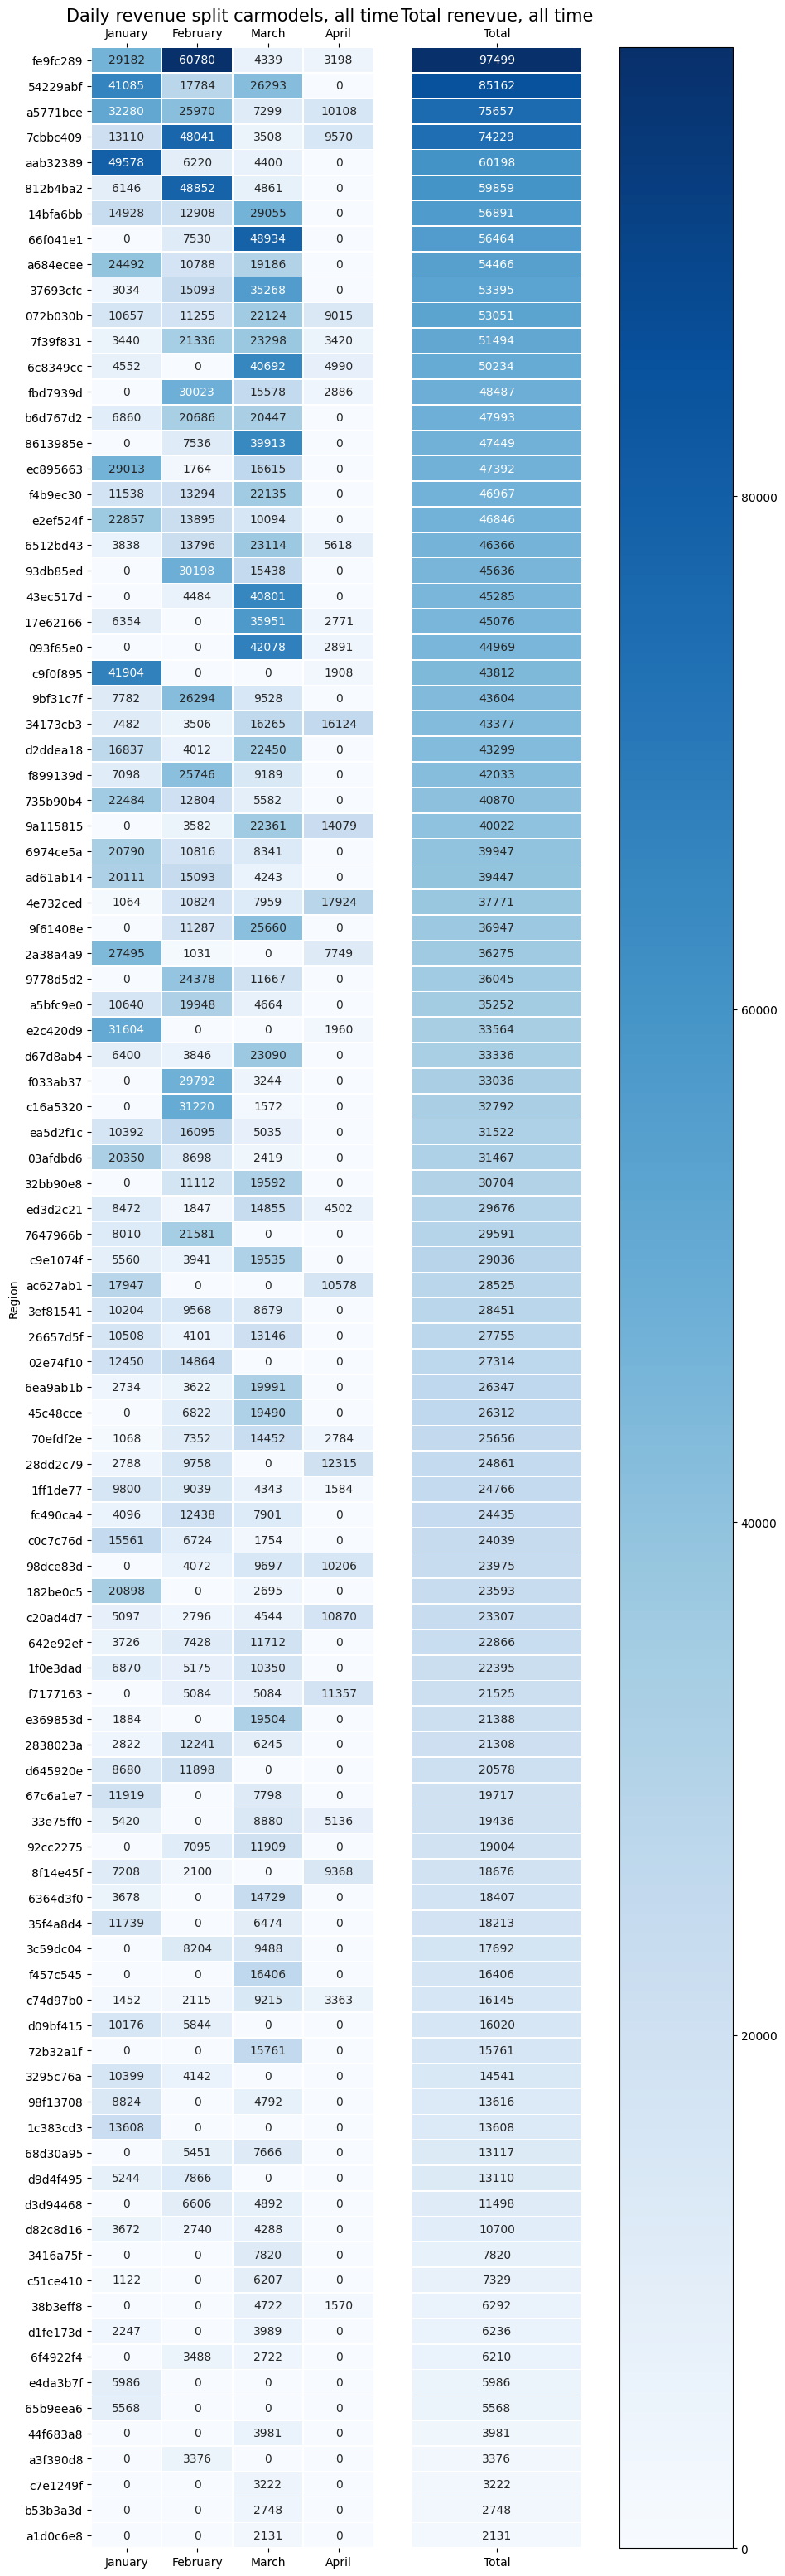

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols= 3,figsize=(10, 40), dpi= 100, gridspec_kw=dict(width_ratios=[5,3,2]))

sns.heatmap(heat_plot[columns_sequence],cmap="Blues", vmin=0 ,linewidths=.5, annot=True, fmt='g', cbar=False, yticklabels=True, ax=ax[0])
sns.heatmap(total_res[['Total']],cmap="Blues", vmin=0 ,linewidths=.5, annot=True, fmt='g', cbar=False, yticklabels=False, ax=ax[1])

fig.colorbar(ax[1].collections[0], cax=ax[2])

ax[0].set_title(f'Daily revenue split carmodels, all time',fontsize=15)
ax[1].set_title('Total renevue, all time',fontsize=15)

ax[0].set(xlabel='', ylabel='Region')
ax[1].set(xlabel='', ylabel='')

ax[0].tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
ax[1].tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)

#plt.tick_params(axis='x',top=True)
plt.yticks(rotation=0)